In [1]:
import pandas as pd
import os, os.path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import support_functions as sf
import importlib
from python_plots import *

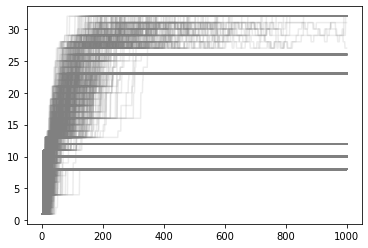

In [13]:
df_read = pd.read_csv("/Users/jsyme/Documents/Projects/FY21/PAF21/complexity_modeling/out/simulate_walks.csv")

for i in range(1, 1001):
    df_tmp = df_read[df_read["run_id"] == i]
    x = np.array(df_tmp["time_period"])
    y = np.array(df_tmp["state"])
    
    plt.plot(x, y, alpha = 0.15, color = "gray")
plt.show()


In [2]:
def get_markov_data_for_plots(dir_read: str):
    
    # check directory
    if not os.path.exists(dir_read):
        raise ValueError(f"Error in get_markov_data_for_plots: directory {dir_read} not found.")
    
    # check files
    fns_req = ["attribute_scenario", "attribute_state", "expected_outcome_by_edge", "outcome_values", "simulated_walks"]
    for fl in fns_req:
        fp_req = os.path.join(dir_read, f"{fl}.csv")
        if not os.path.exists(fp_req):
            raise ValueError(f"Error in get_markov_data_for_plots: file {fl}.csv not found in {dir_read}.")
    
    dir_base_read = os.path.basename(dir_read)

    # read files, then return
    attr_scenario = sf.AttributeTable(
        os.path.join(dir_read, "attribute_scenario.csv"),
        "scenario_id",
        []
    )
    attr_state = sf.AttributeTable(
        os.path.join(dir_read, "attribute_state.csv"),
        "state",
        []
    )

    df_expected_outcome = pd.read_csv(os.path.join(dir_read, "expected_outcome_by_edge.csv"))
    df_ov = pd.read_csv(os.path.join(dir_read, "outcome_values.csv"))
    df_walks = pd.read_csv(os.path.join(dir_read, "simulated_walks.csv"))

    return attr_scenario, attr_state, df_expected_outcome, df_ov, df_walks
    

/Users/jsyme/Documents/Projects/FY21/PAF21/markov_decision_utilities/python/python_plots.py:280: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (18, 18))


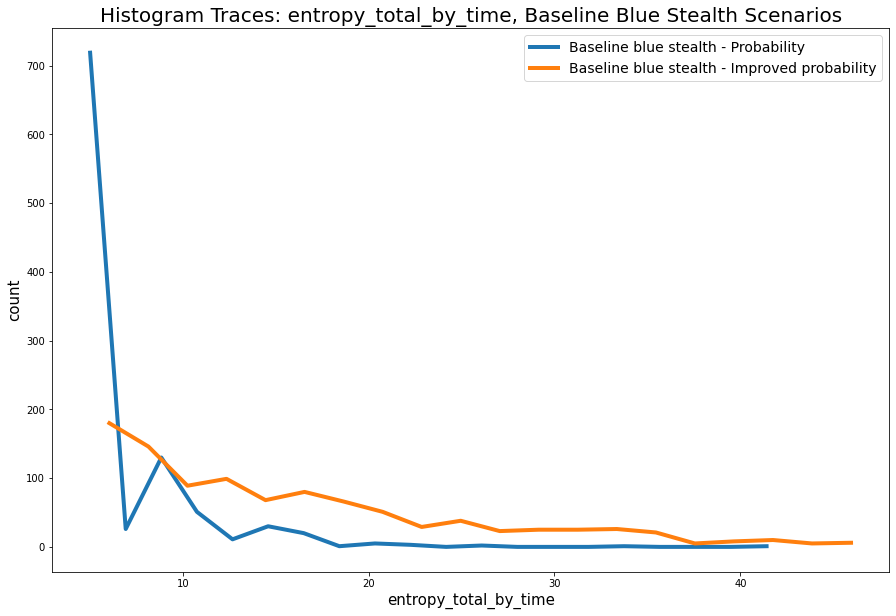

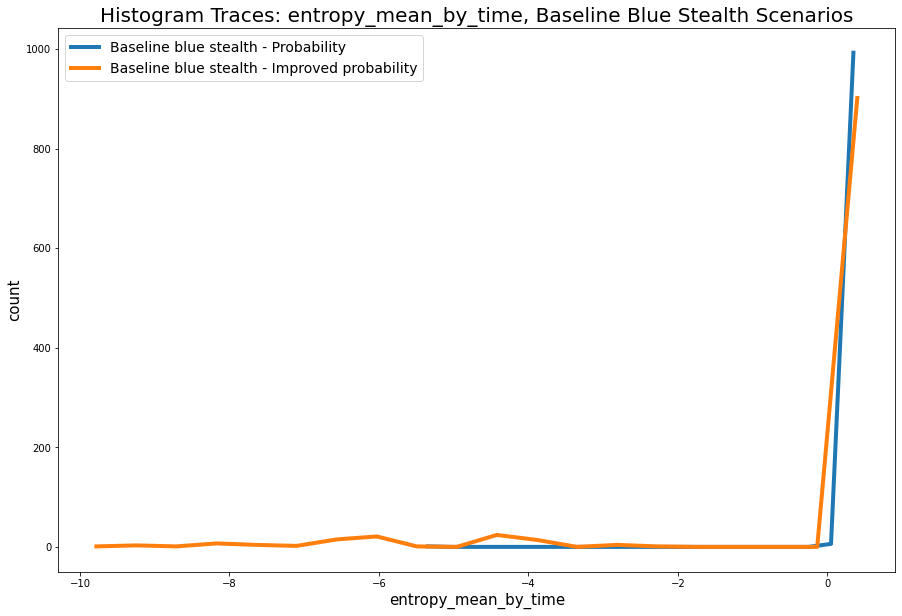

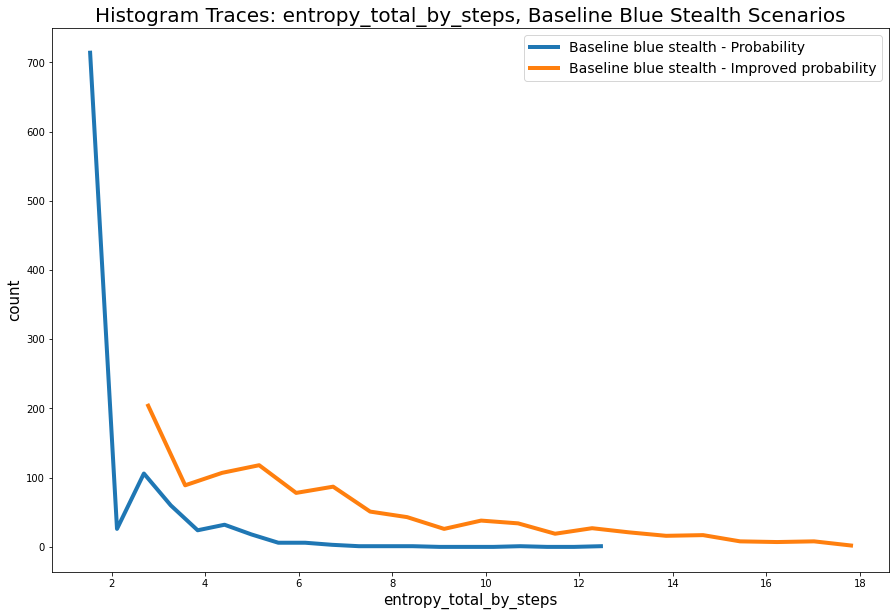

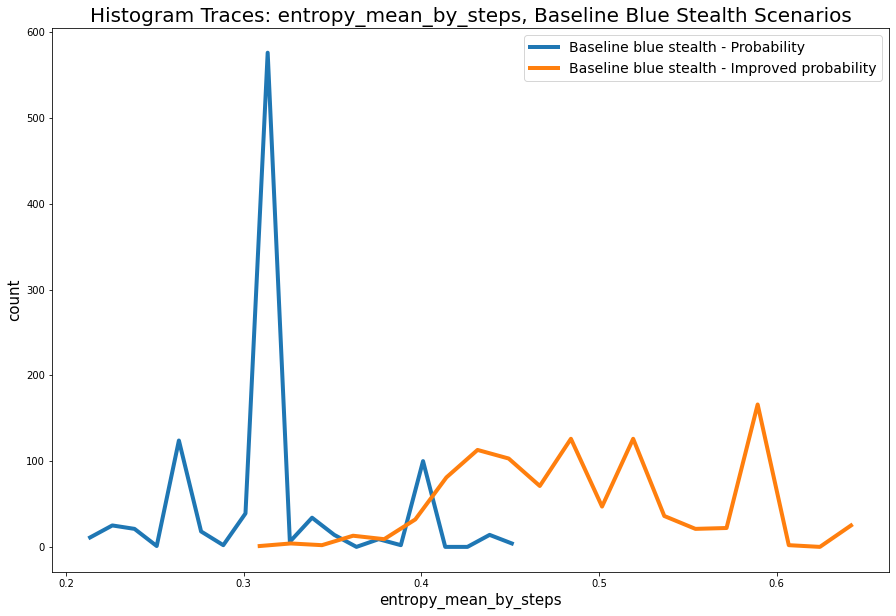

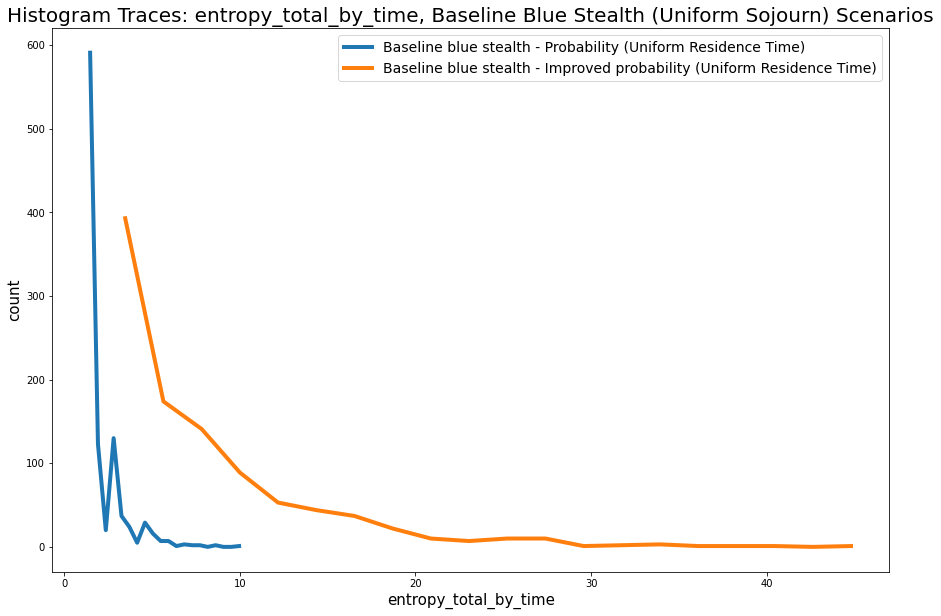

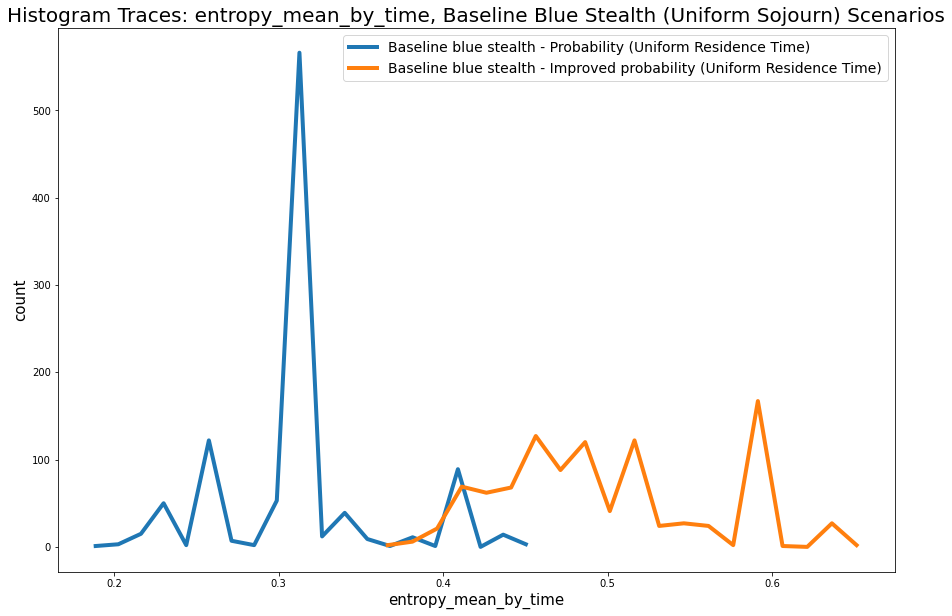

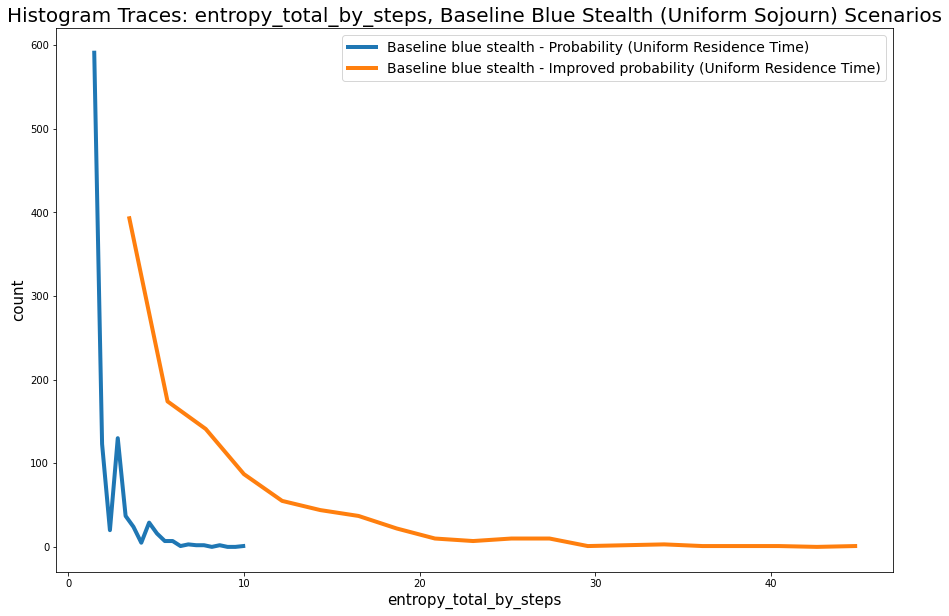

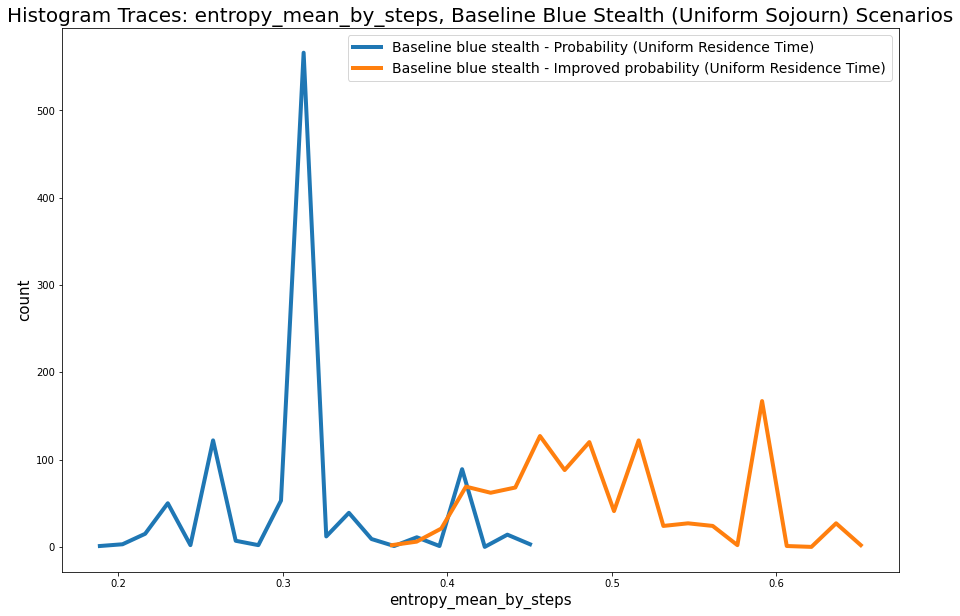

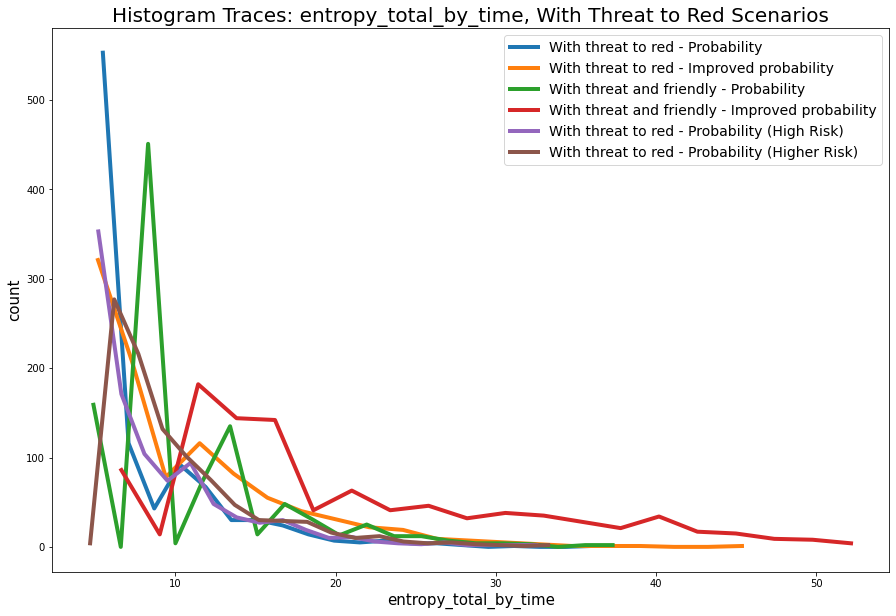

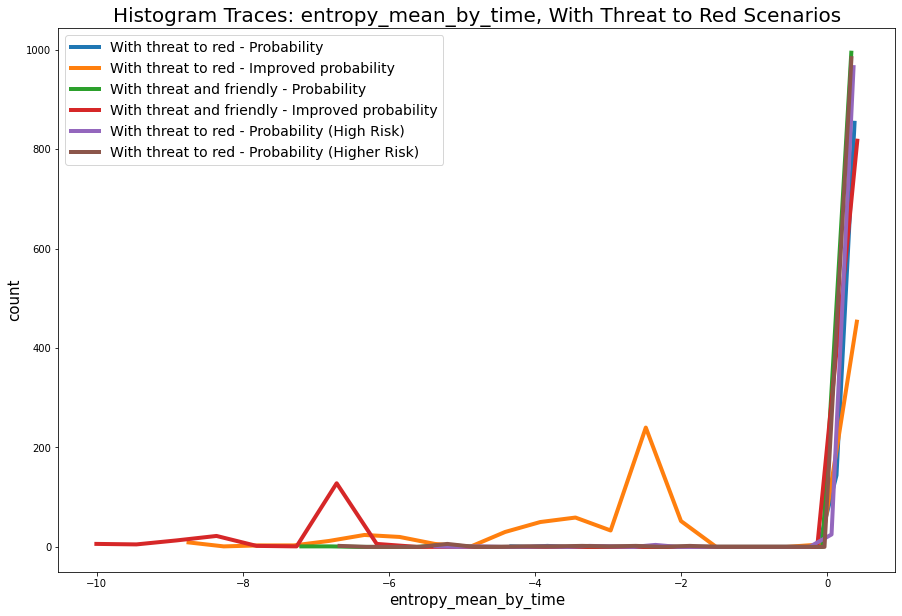

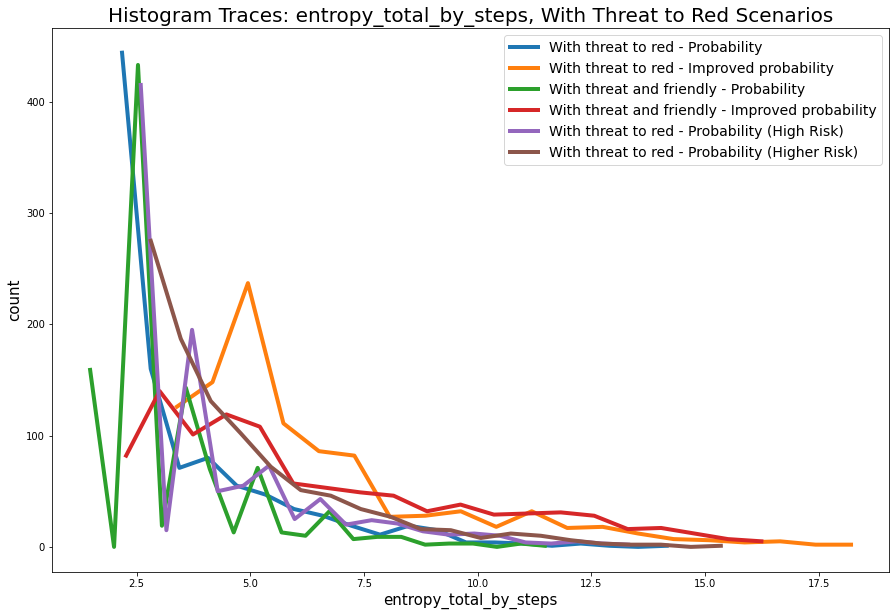

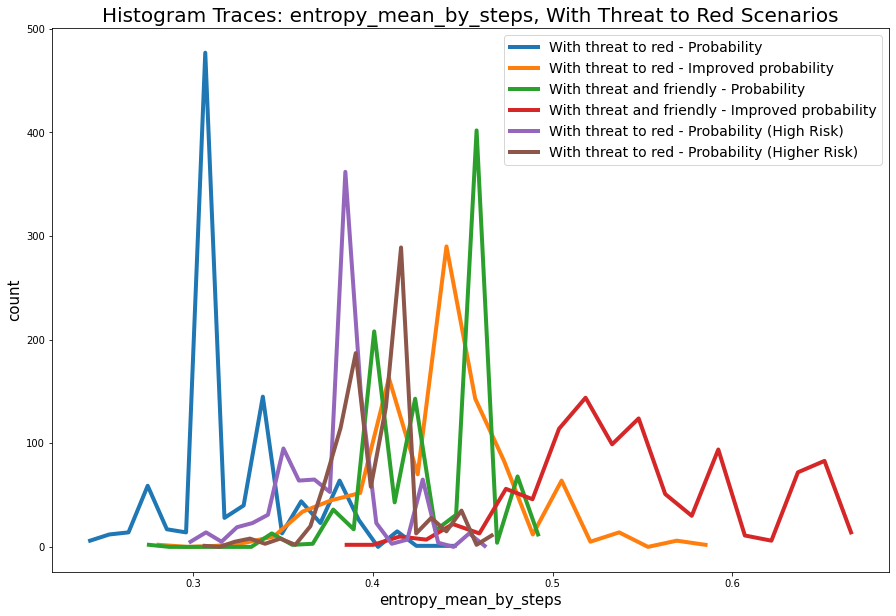

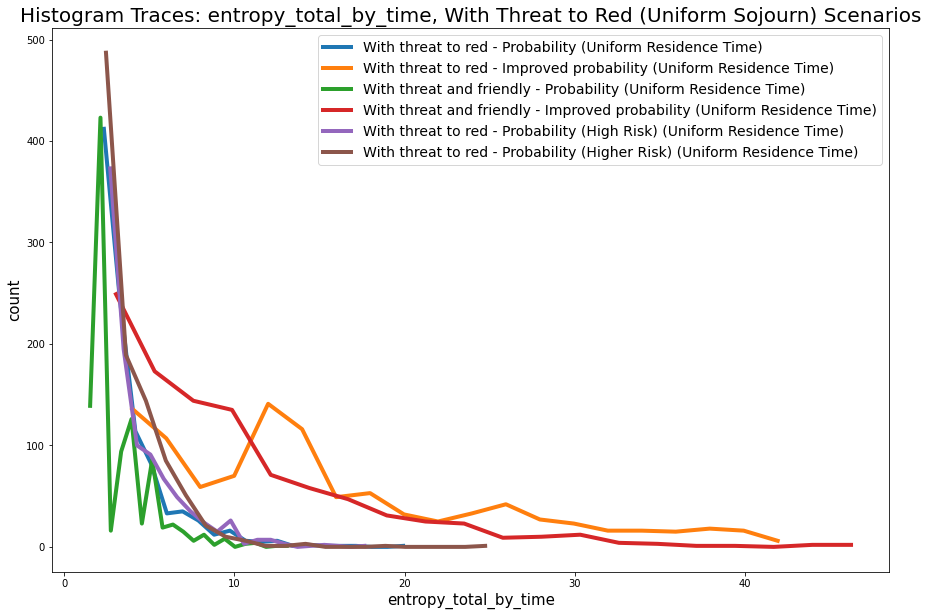

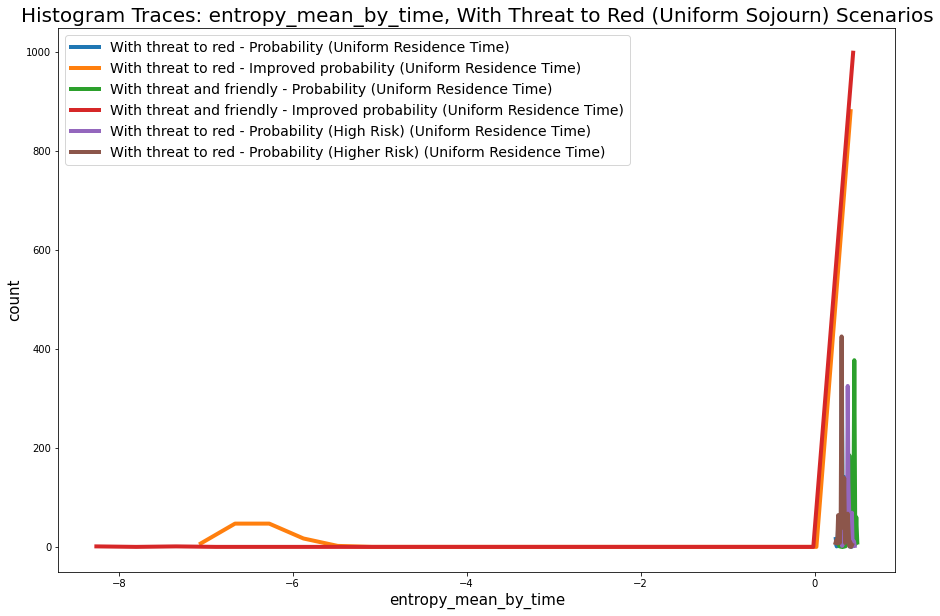

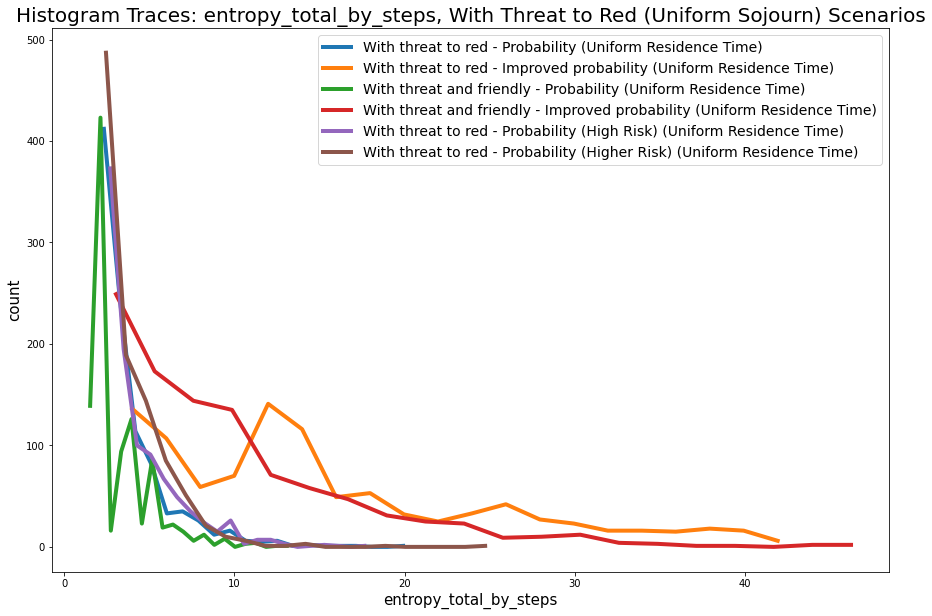

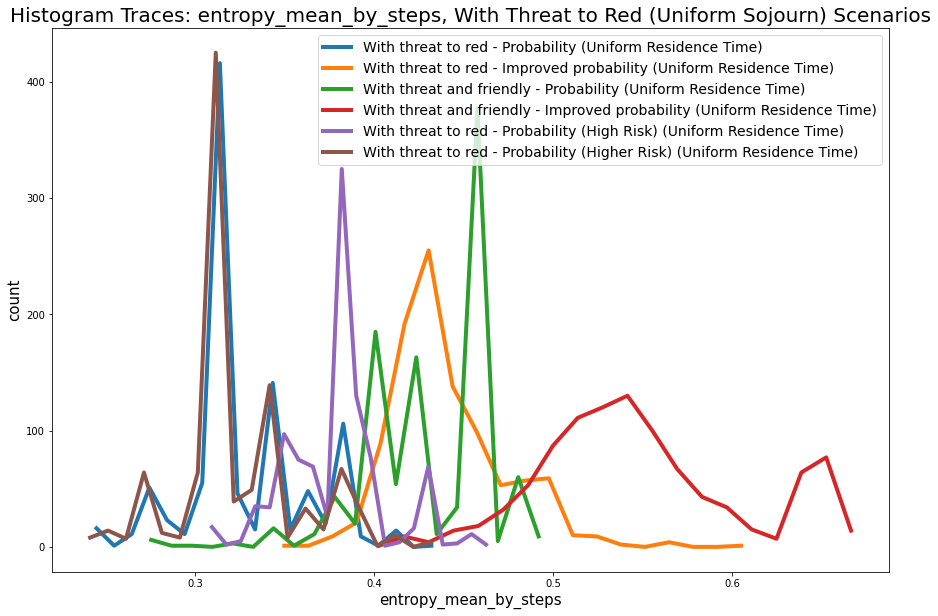

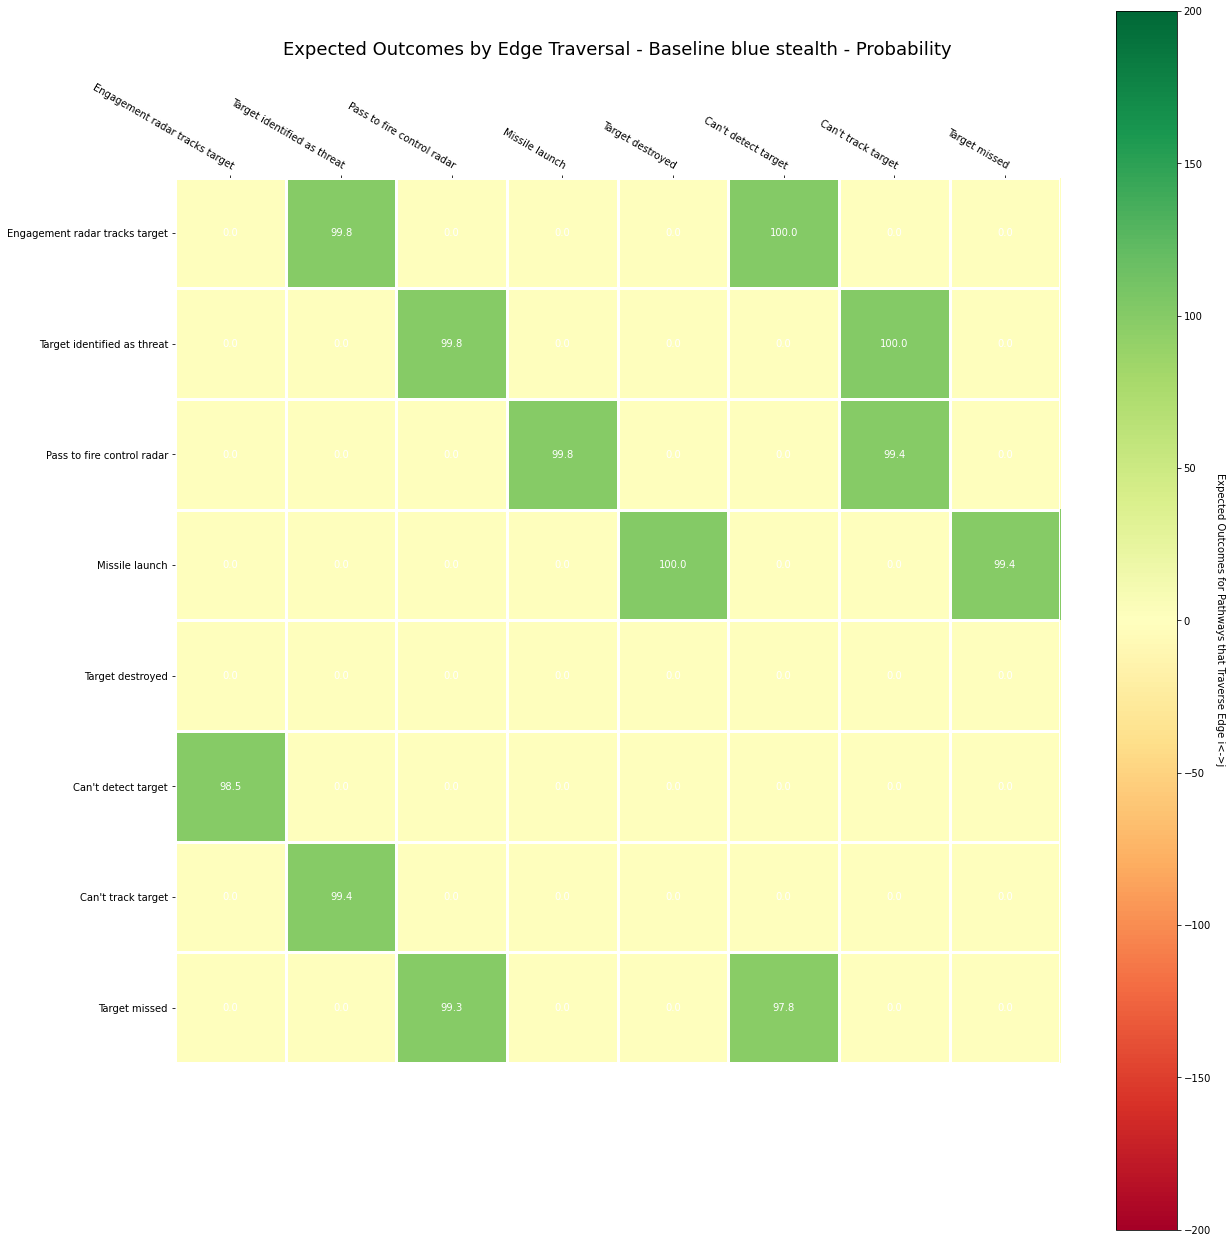

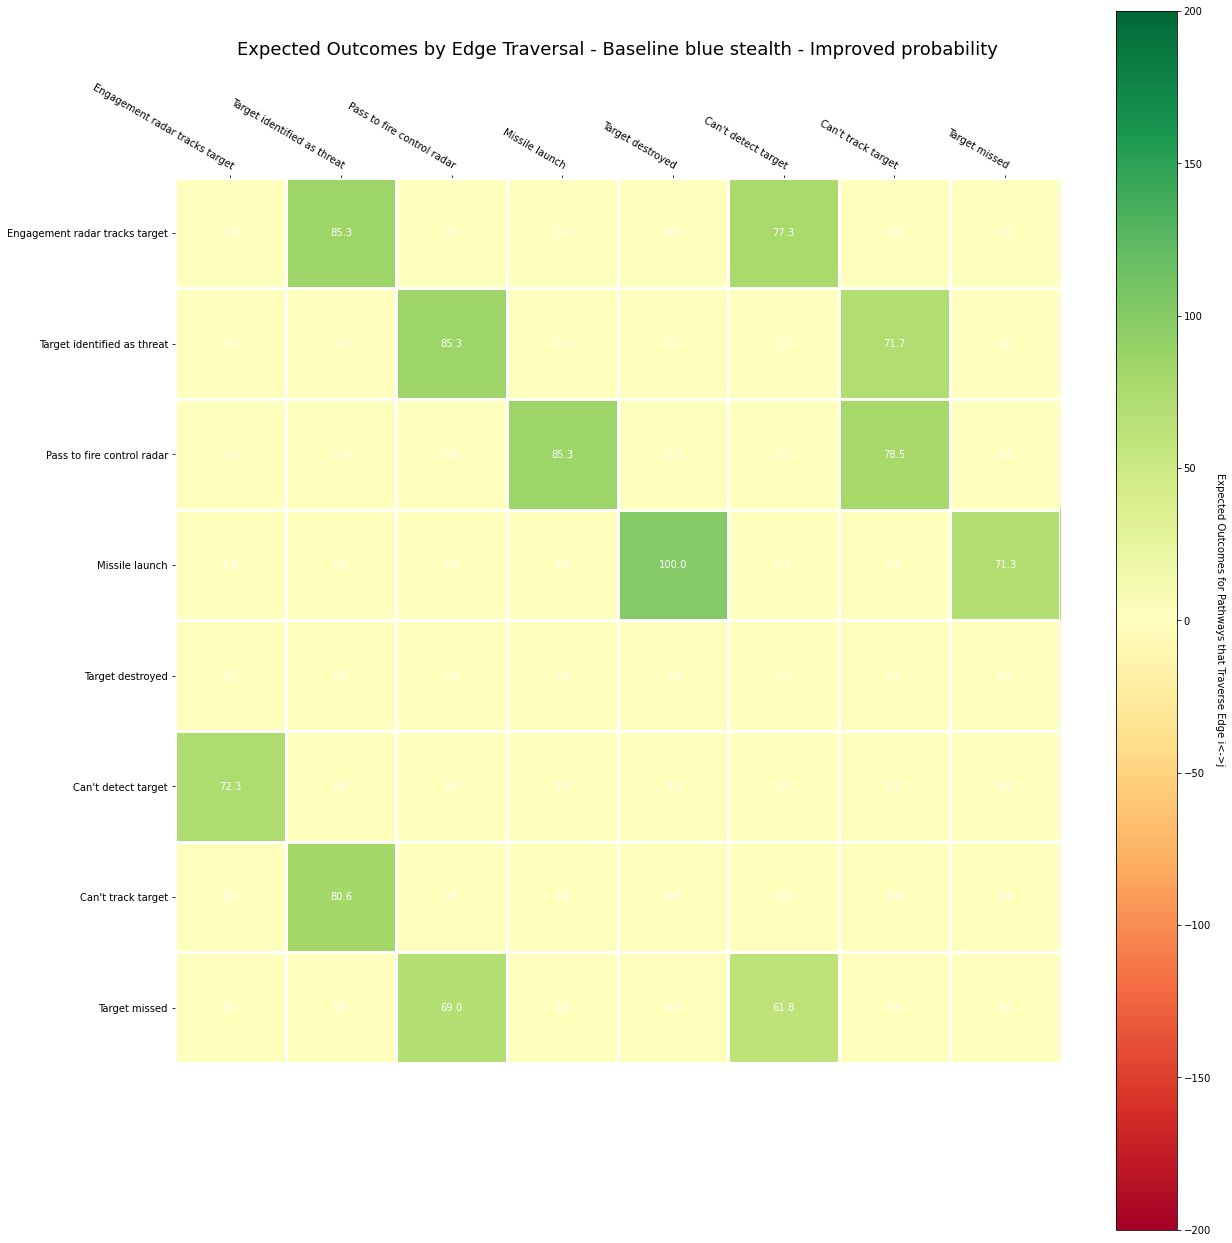

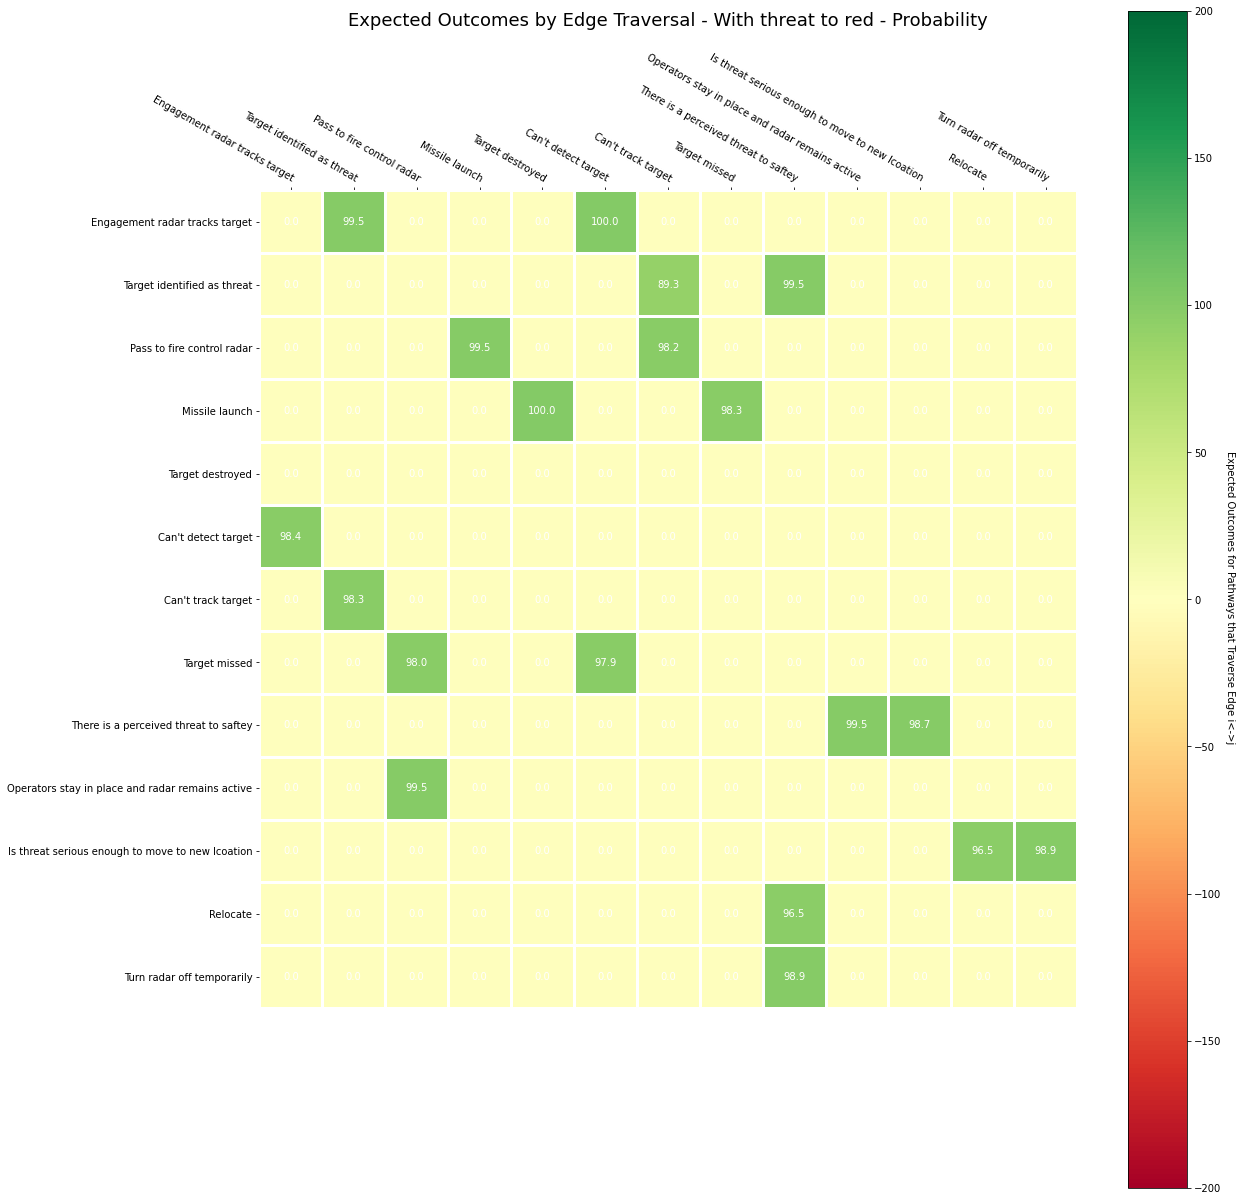

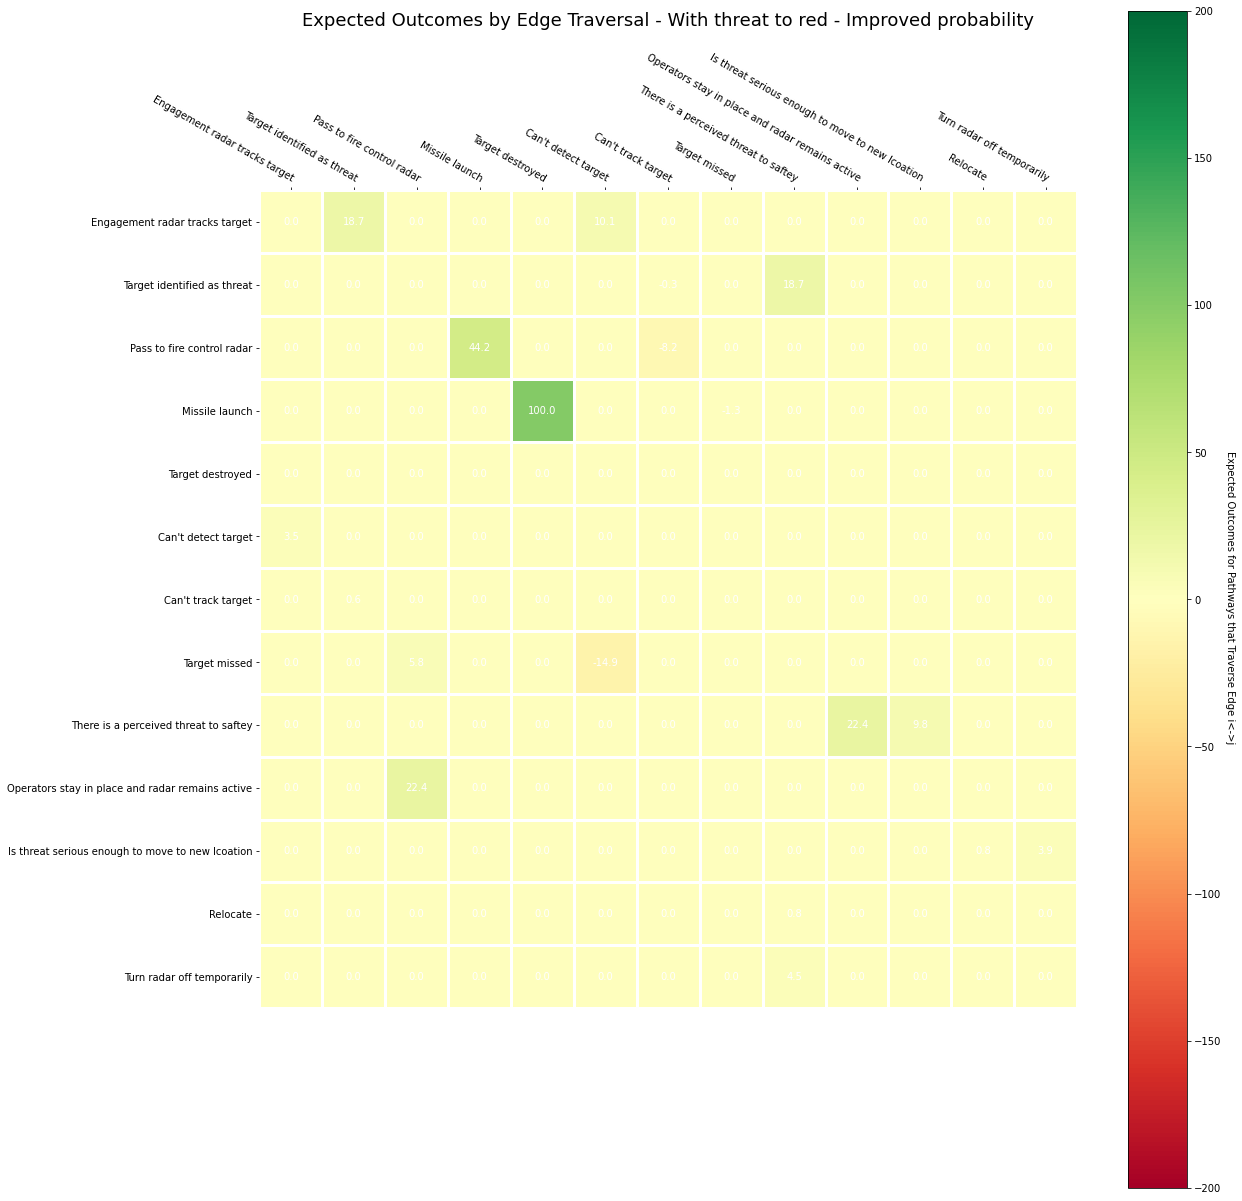

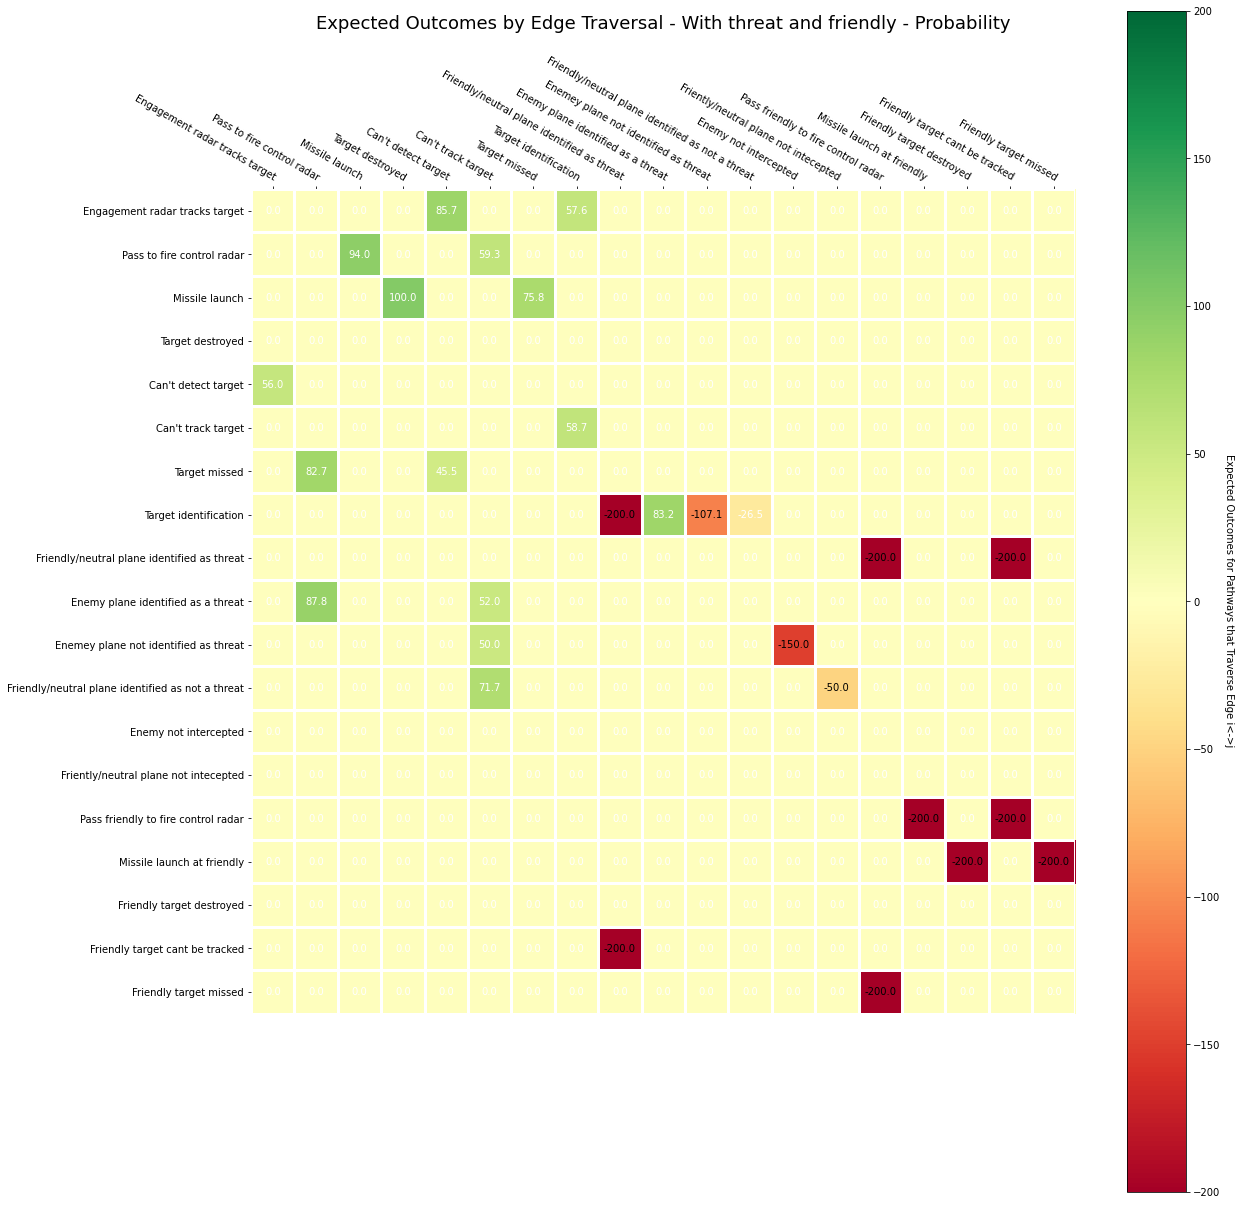

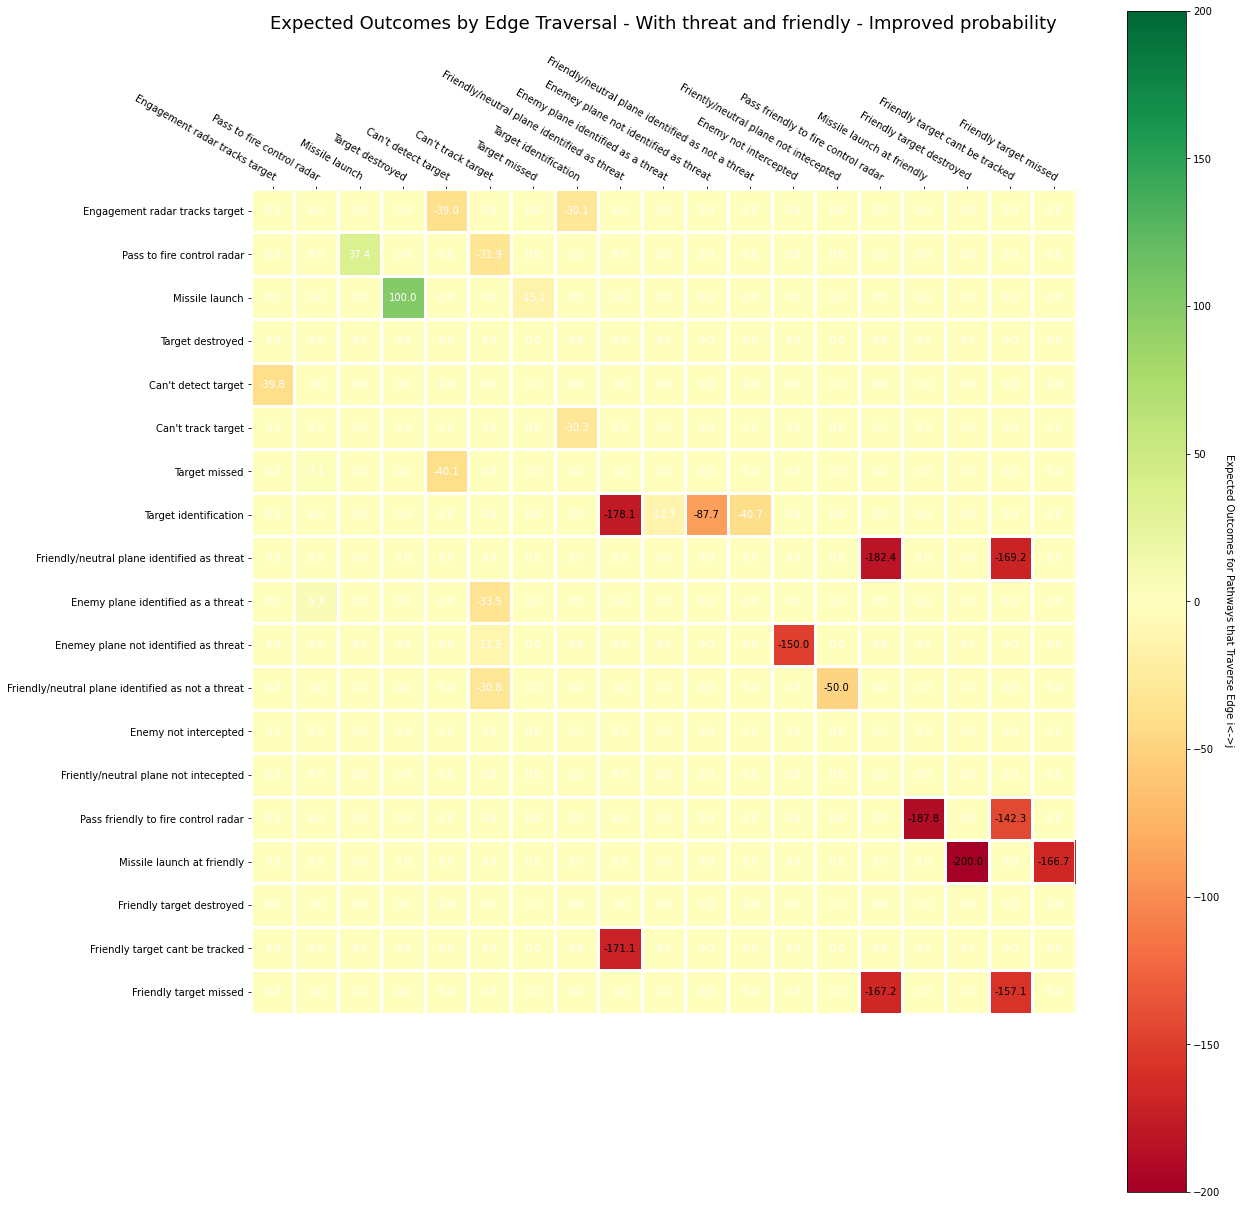

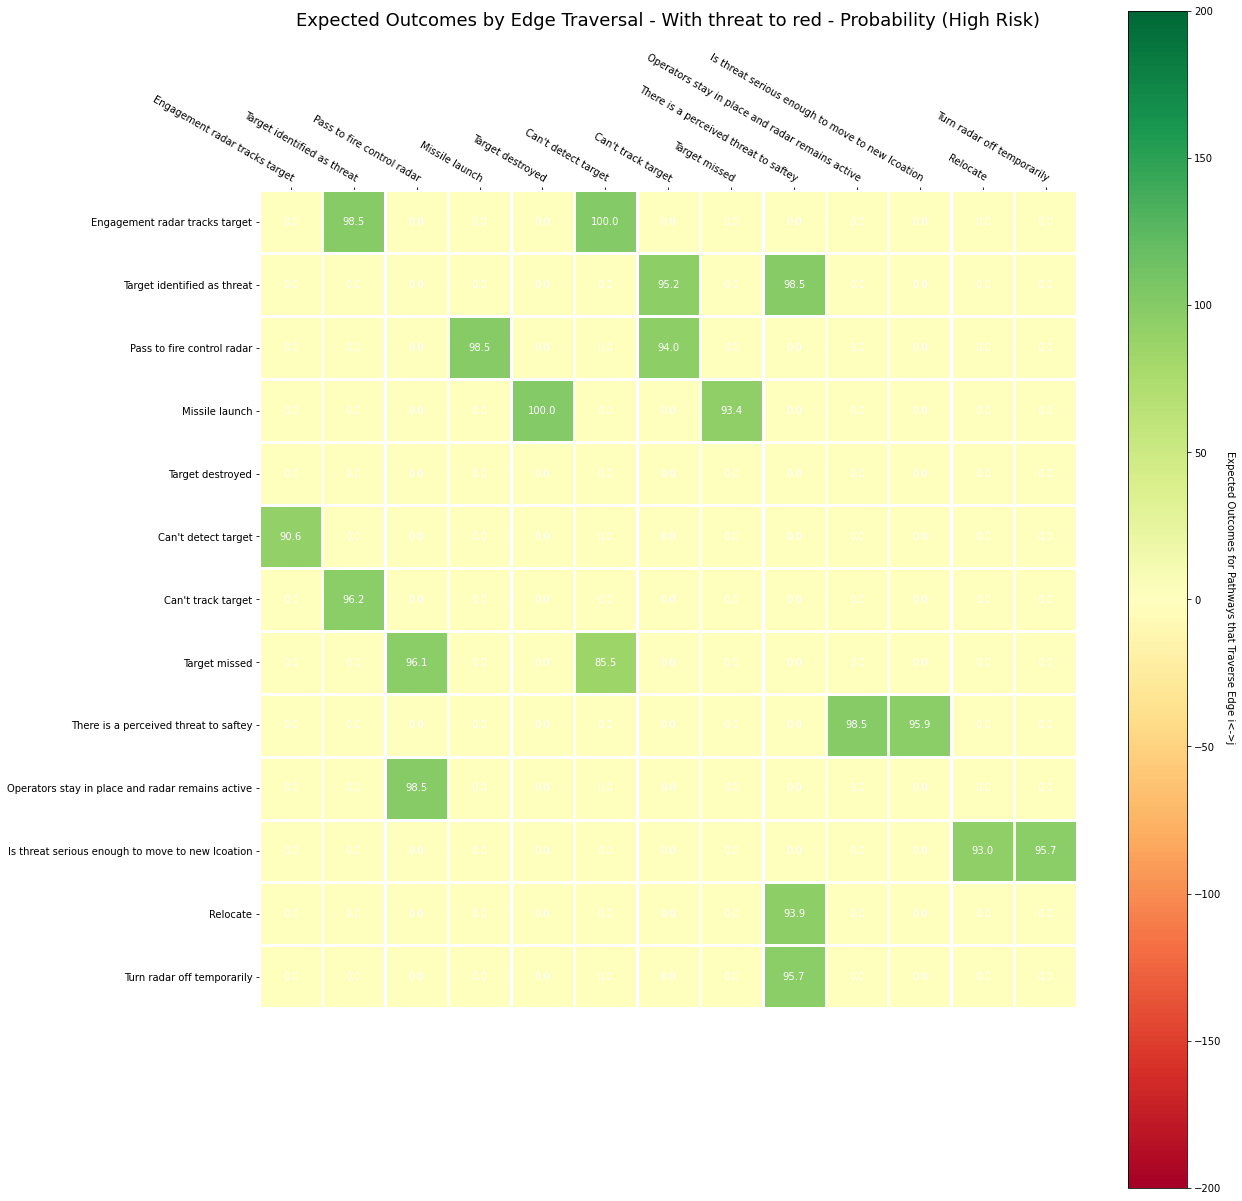

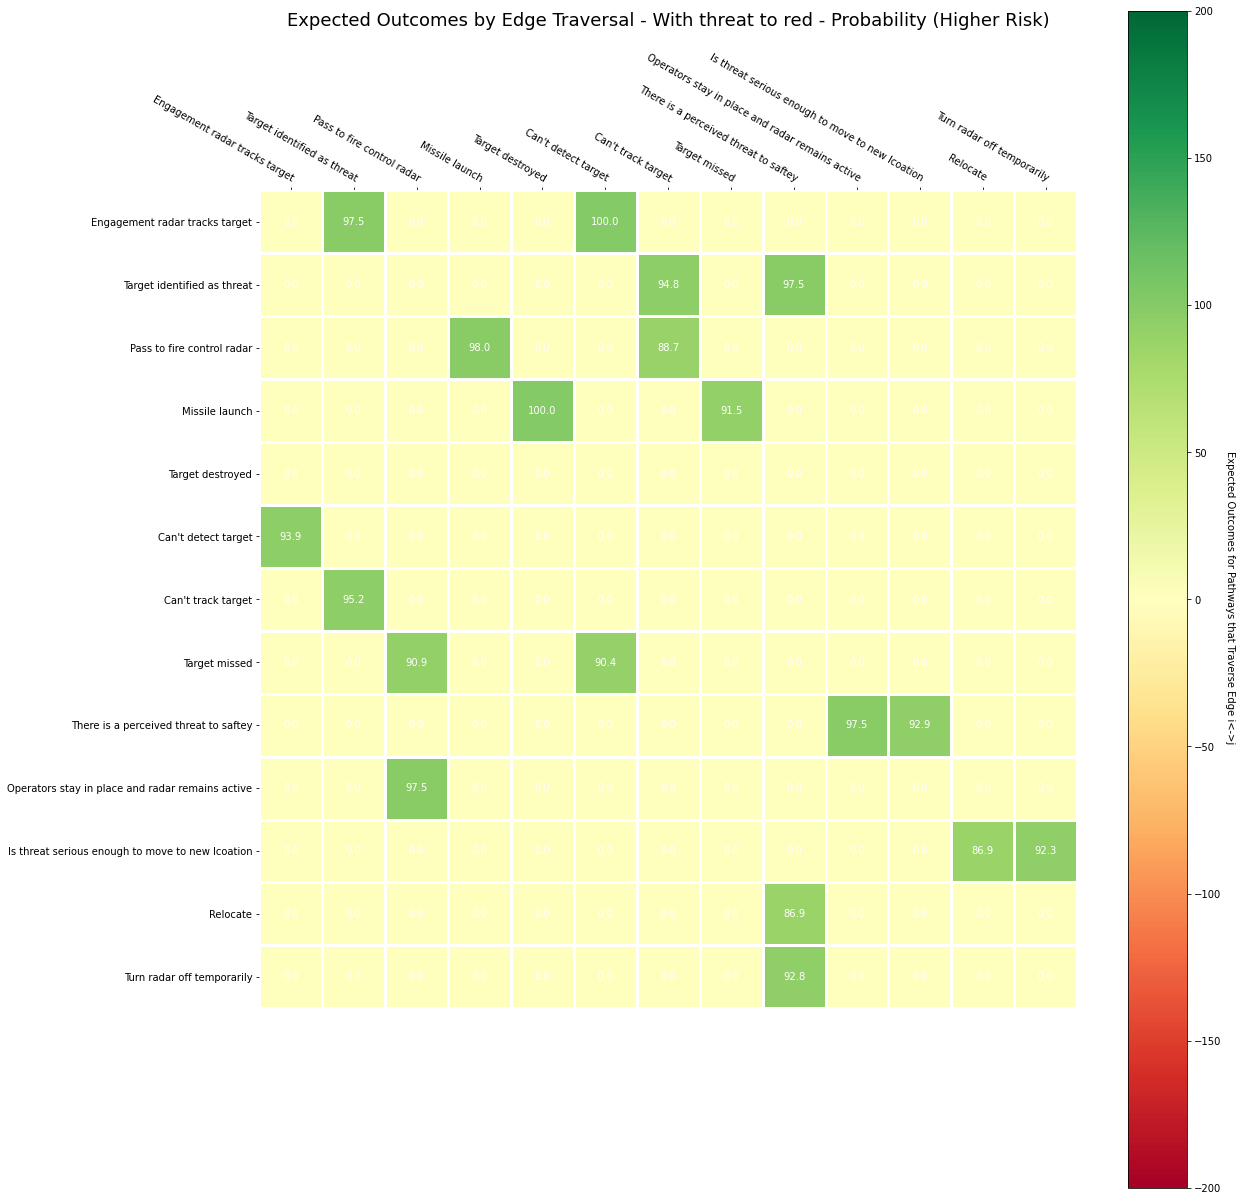

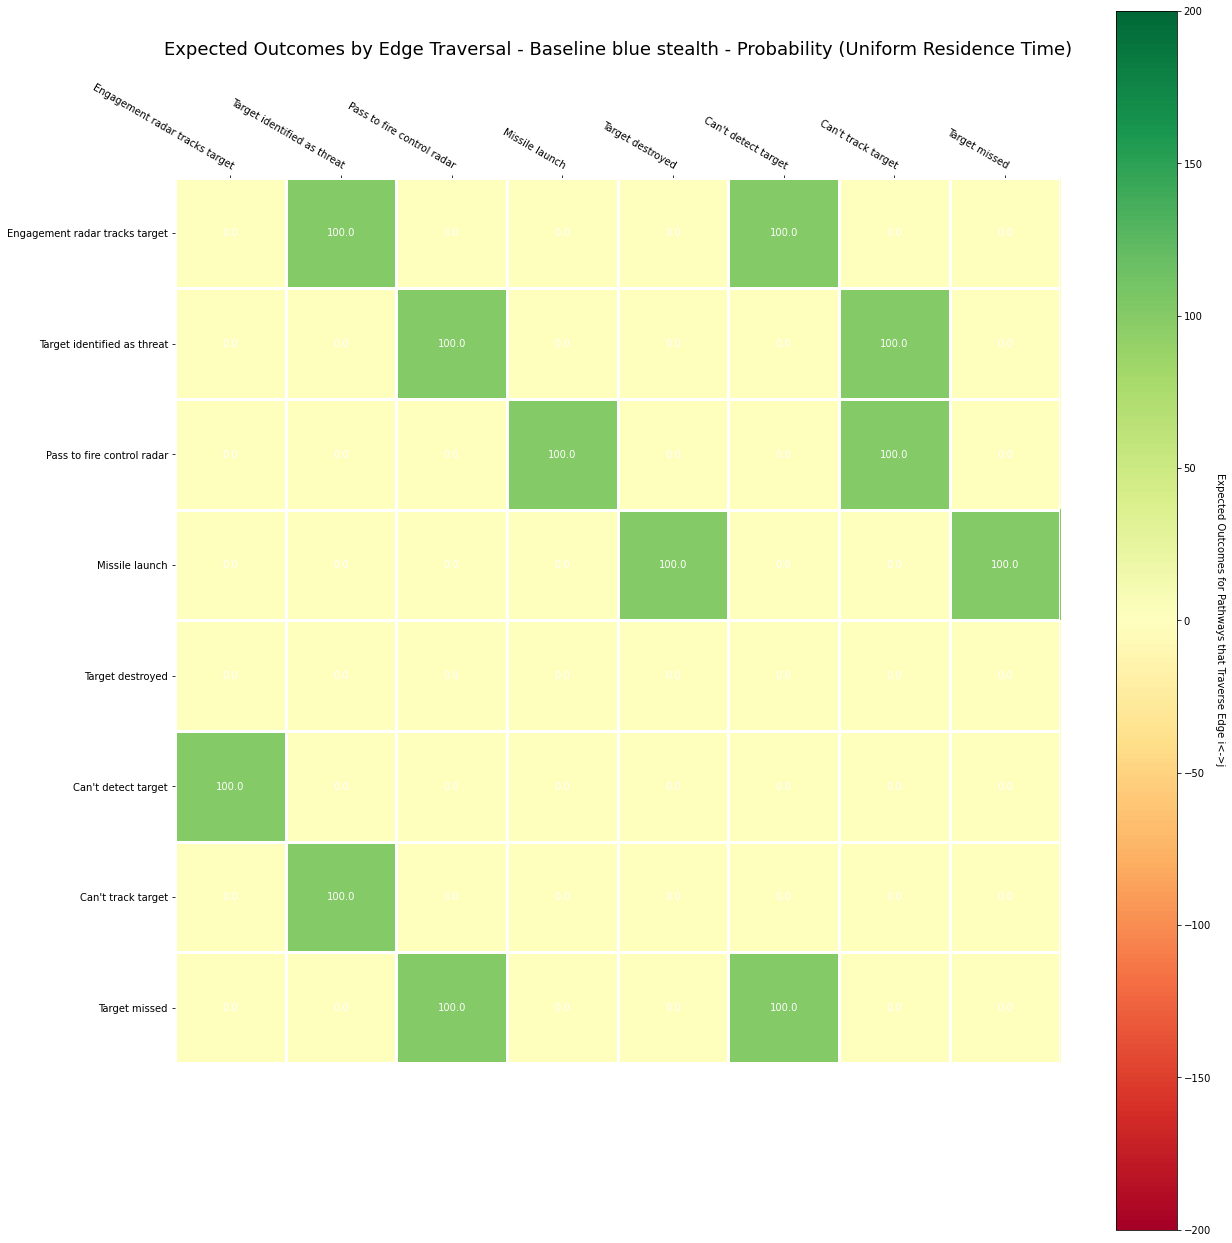

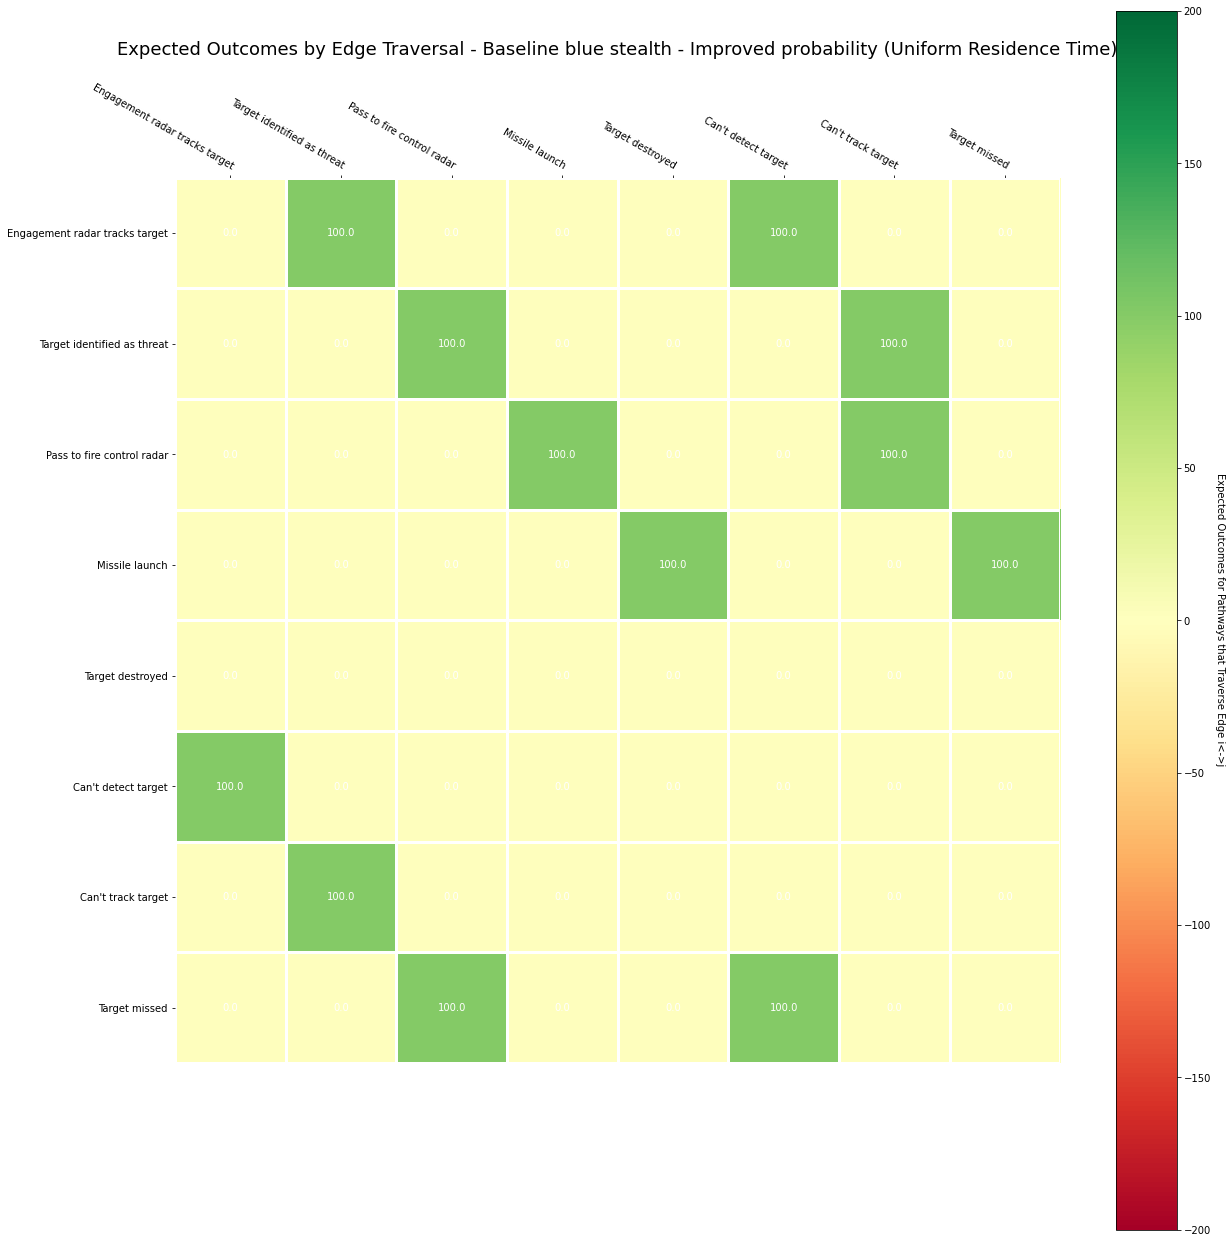

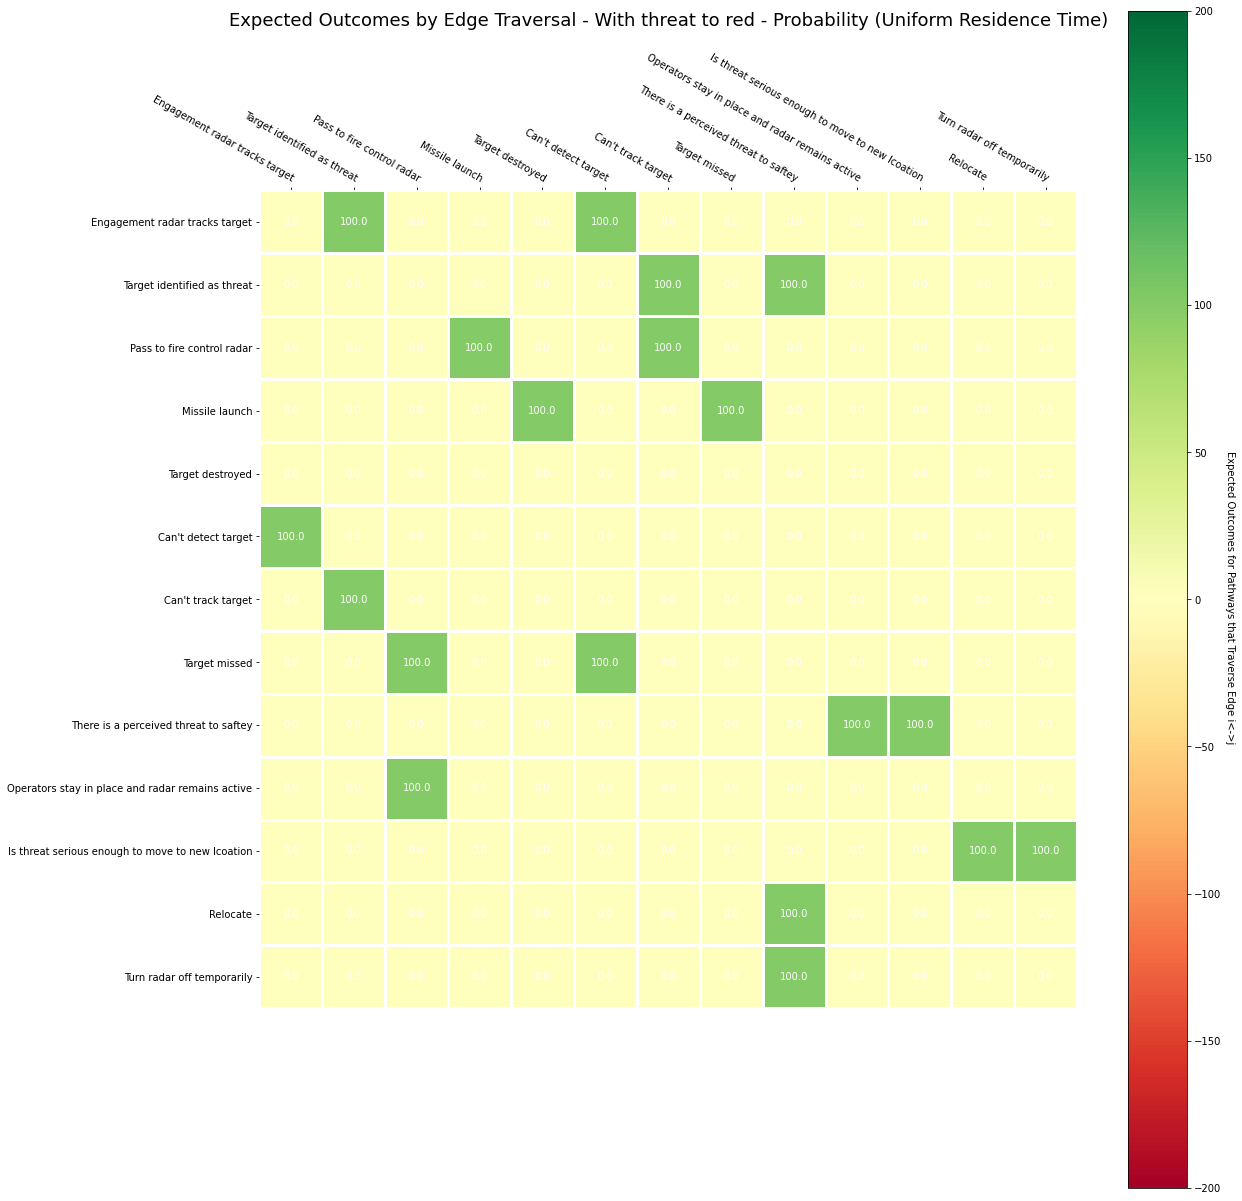

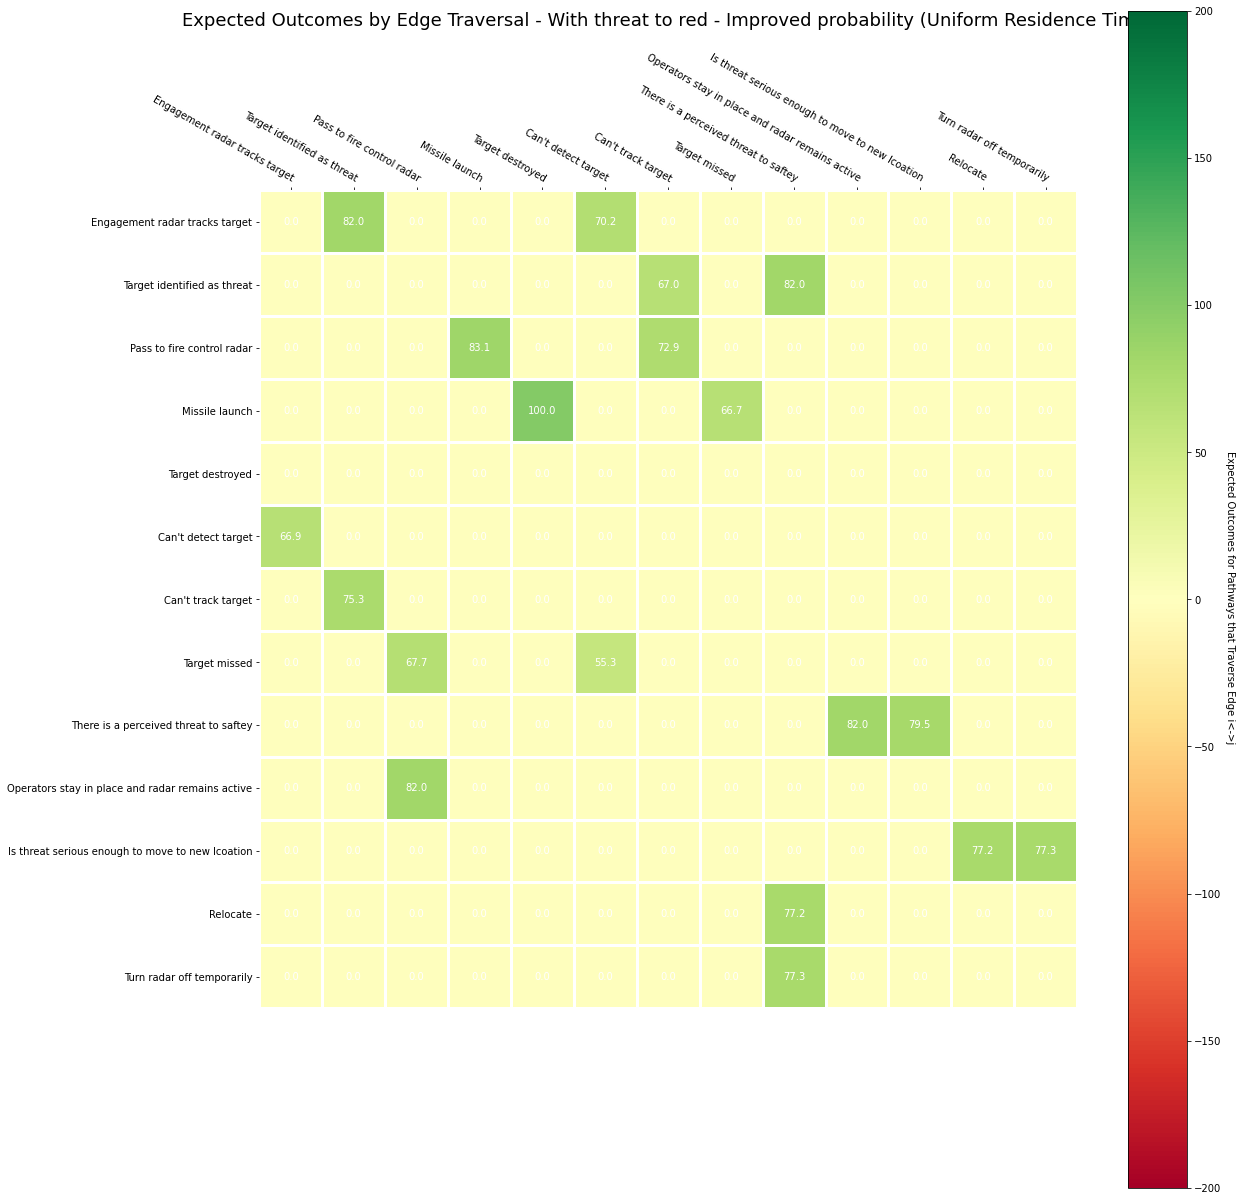

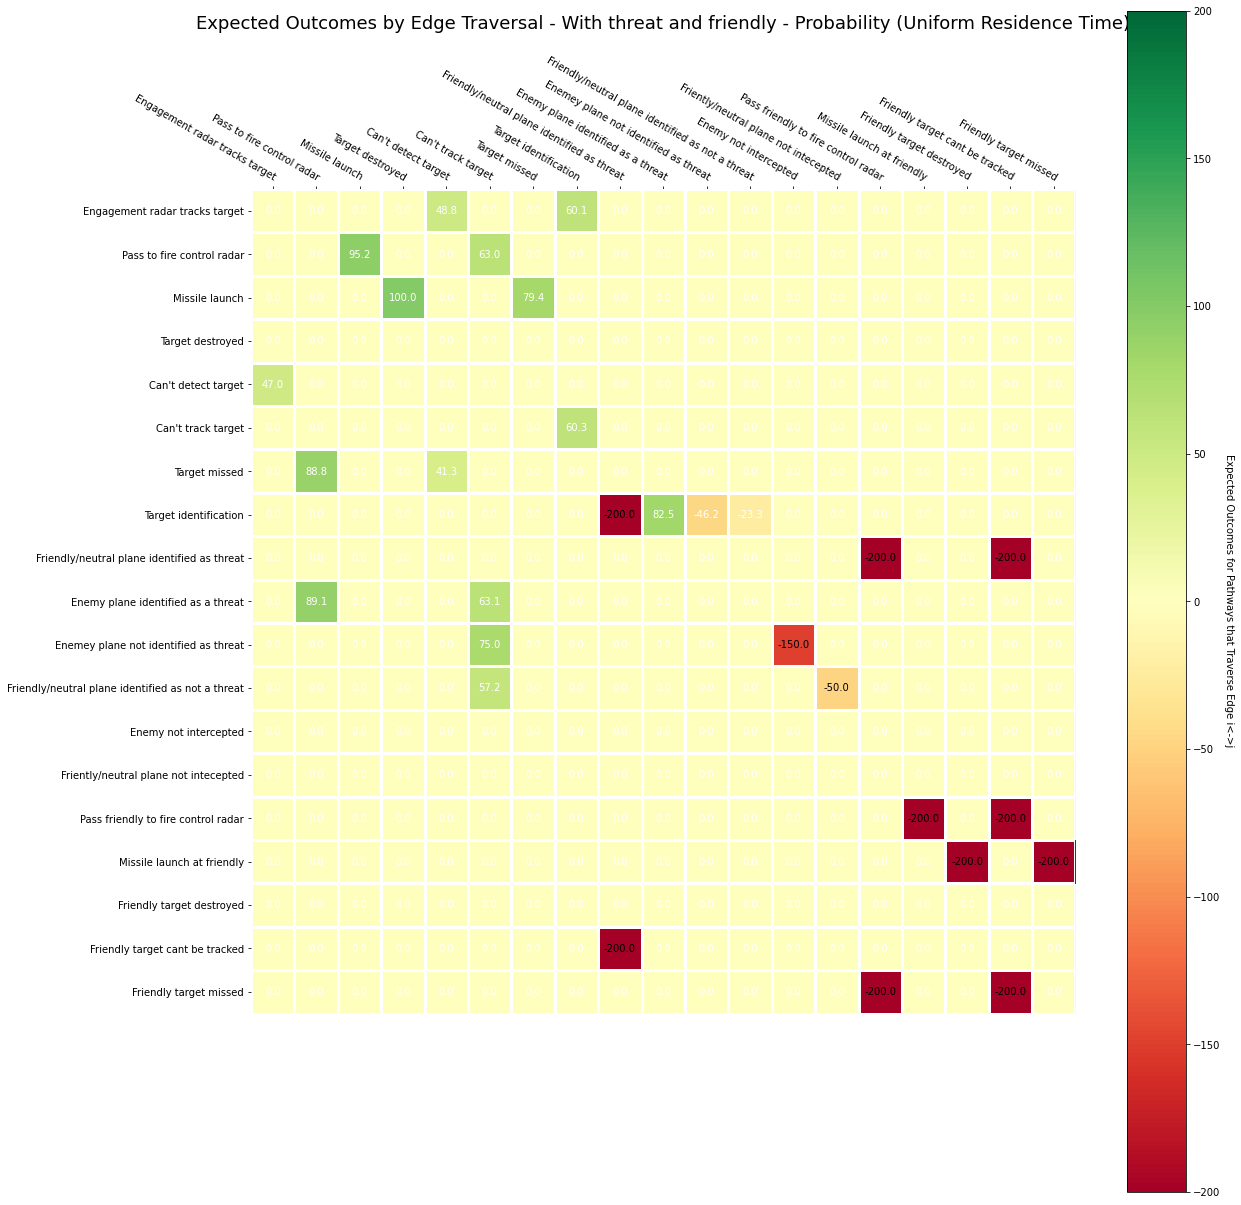

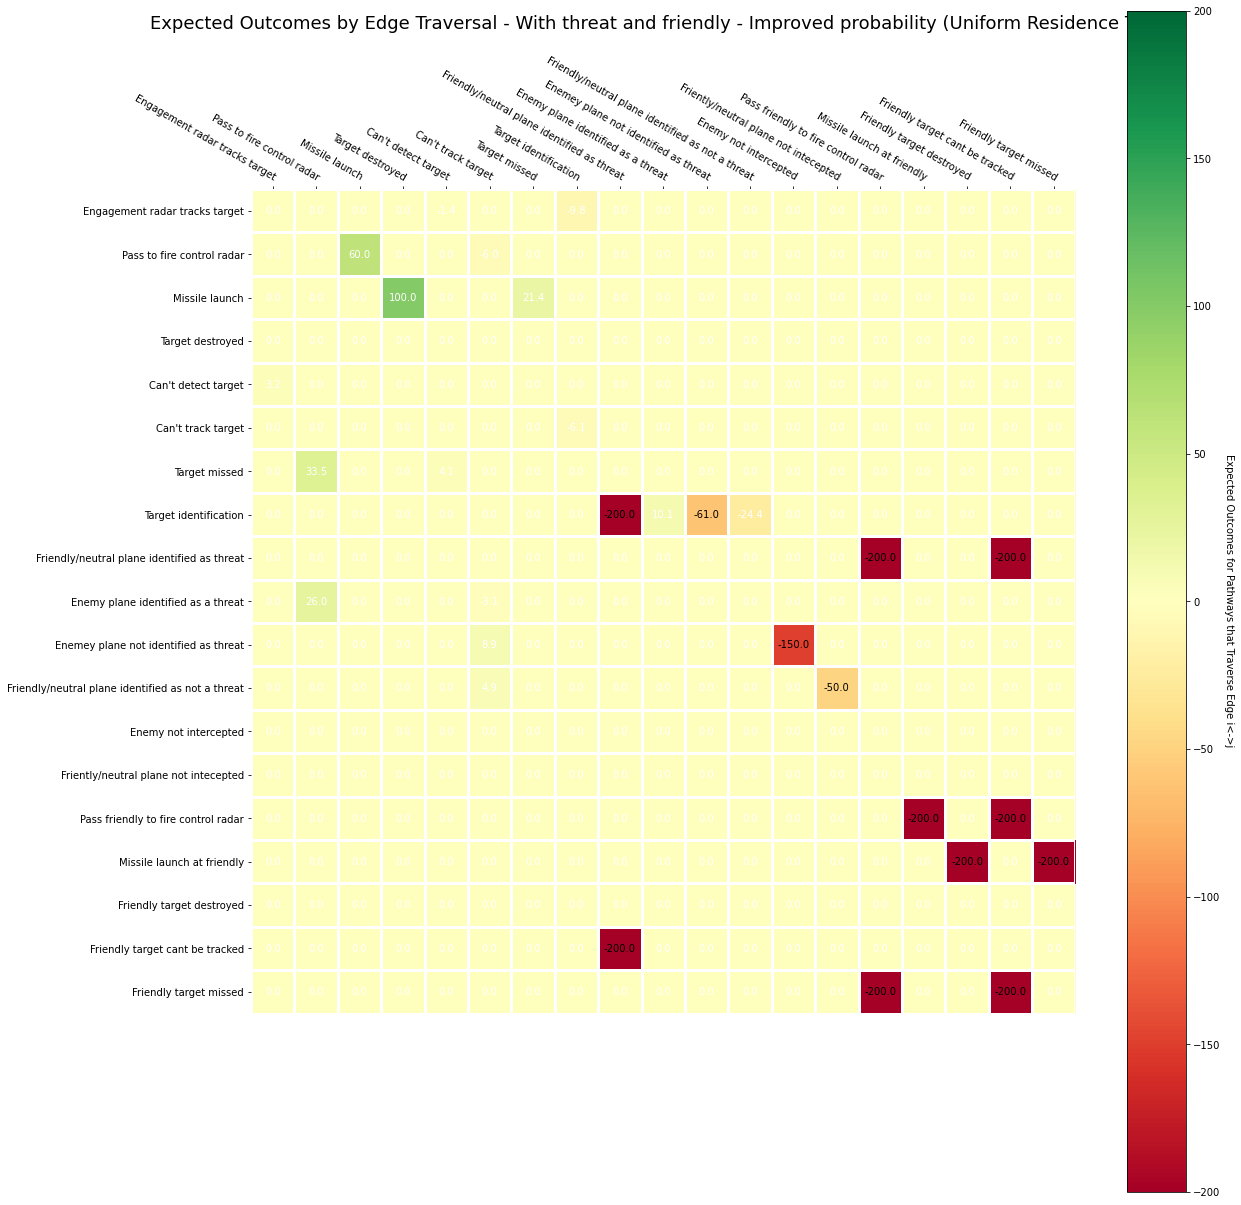

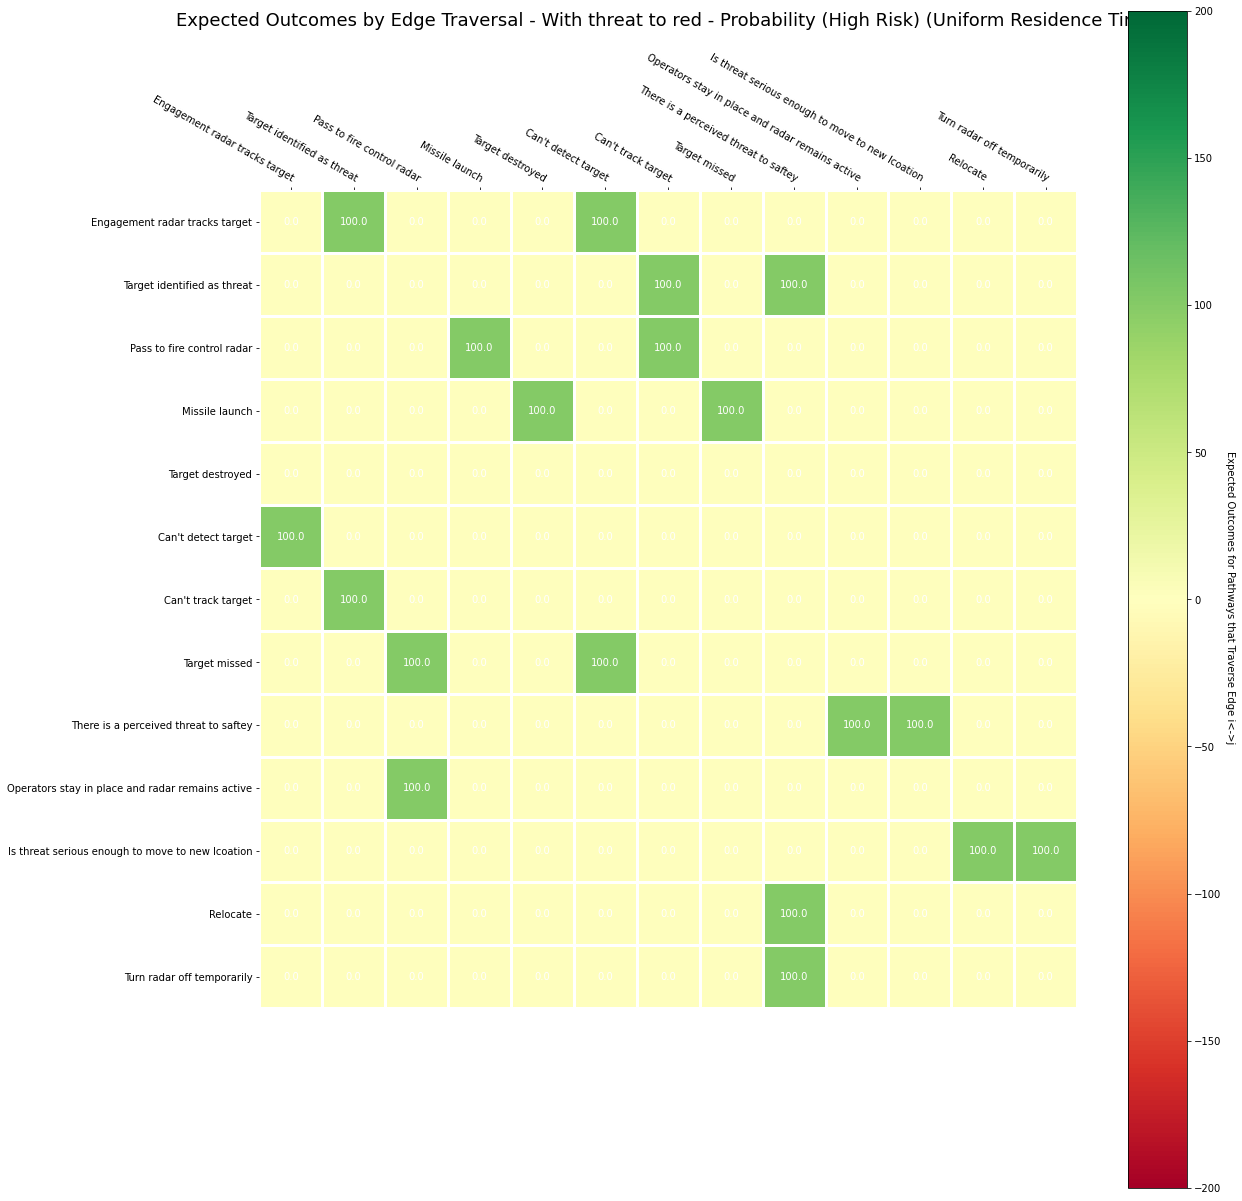

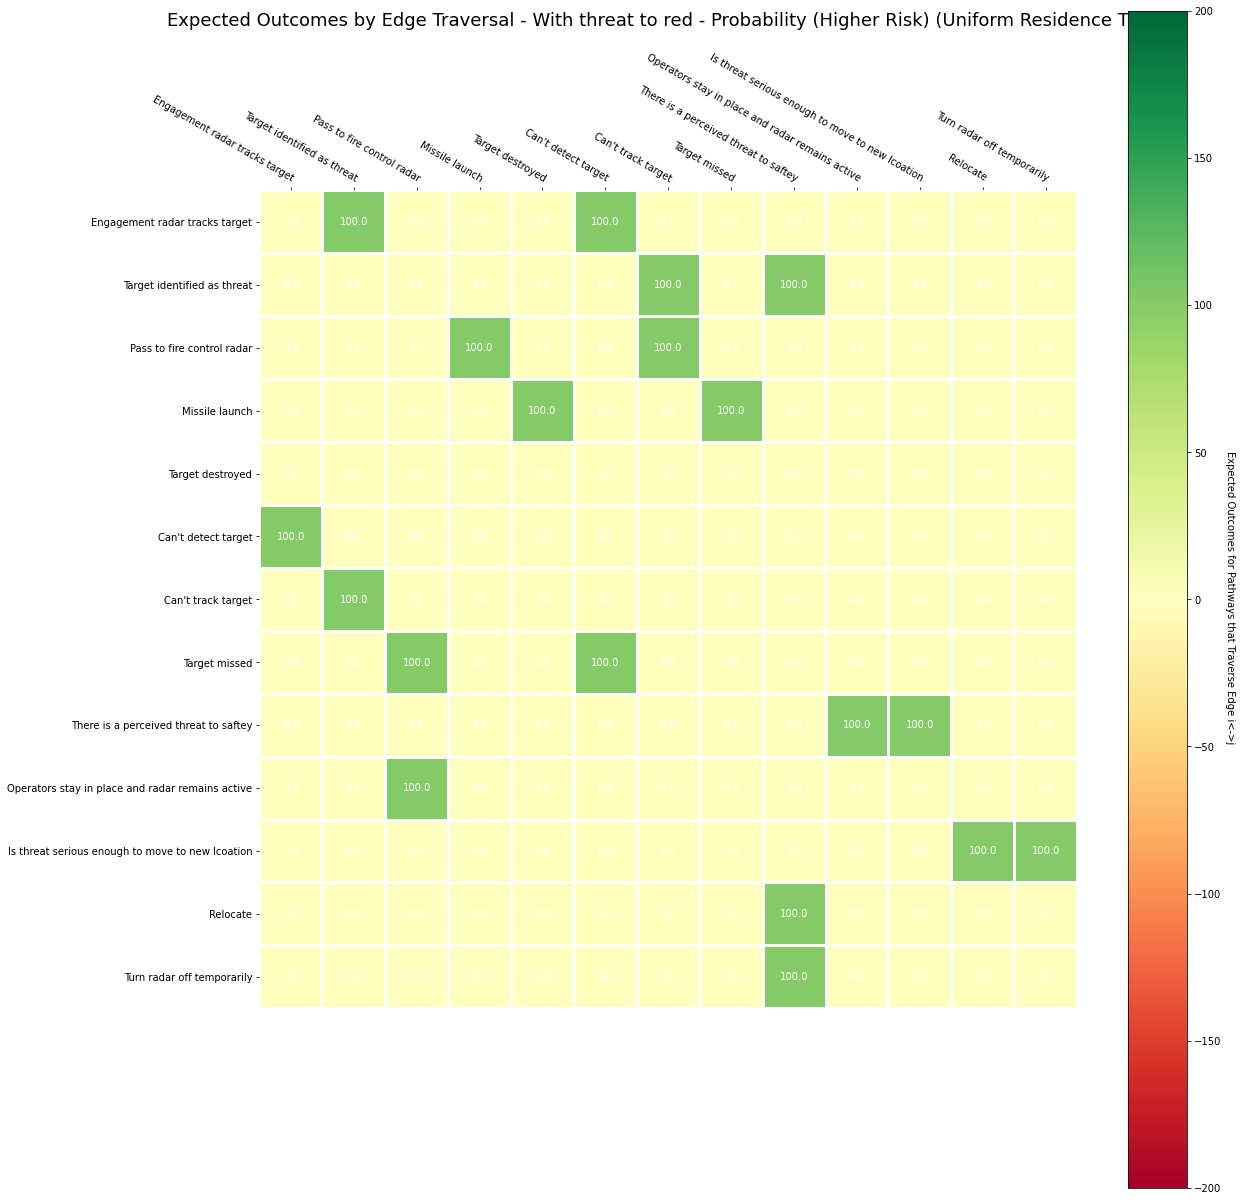

In [3]:
##  RUN SEAD

dir_read = "/Users/jsyme/Documents/Projects/FY21/PAF21/markov_decision_utilities/out/20220503_113036_output_sead"
dir_base_read = os.path.basename(dir_read)
dir_out = os.path.join("..", "out", f"img_{dir_base_read}")

# load data
attr_scenario, attr_state, df_expected_outcome, df_ov, df_walks = get_markov_data_for_plots(dir_read)

# generate plots
generate_overlayed_outcome_histogram_plots(
    df_ov,
    attr_scenario,
    {
        "Baseline Blue Stealth": [0, 1], 
        "With Threat to Red": [2, 3, 4, 5, 6, 7],
        "Baseline Blue Stealth (Uniform Sojourn)": [8, 9], 
        "With Threat to Red (Uniform Sojourn)": [10, 11, 12, 13, 14, 15]
        
    },
    ["entropy_total_by_time", "entropy_mean_by_time", "entropy_total_by_steps", "entropy_mean_by_steps"],
    dir_out
)

generate_expected_value_matrix_plots(
    df_expected_outcome,
    attr_scenario,
    attr_state,        
    dir_out
);






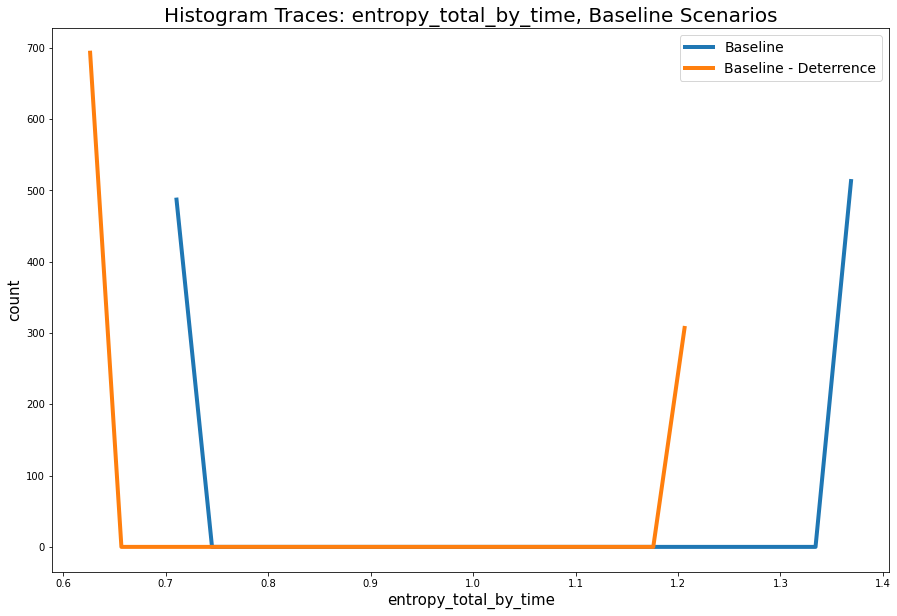

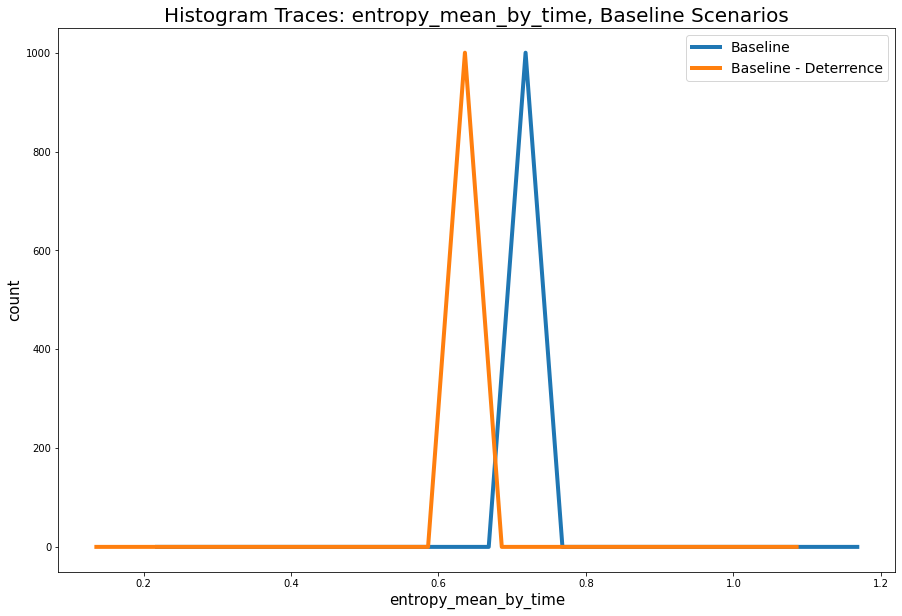

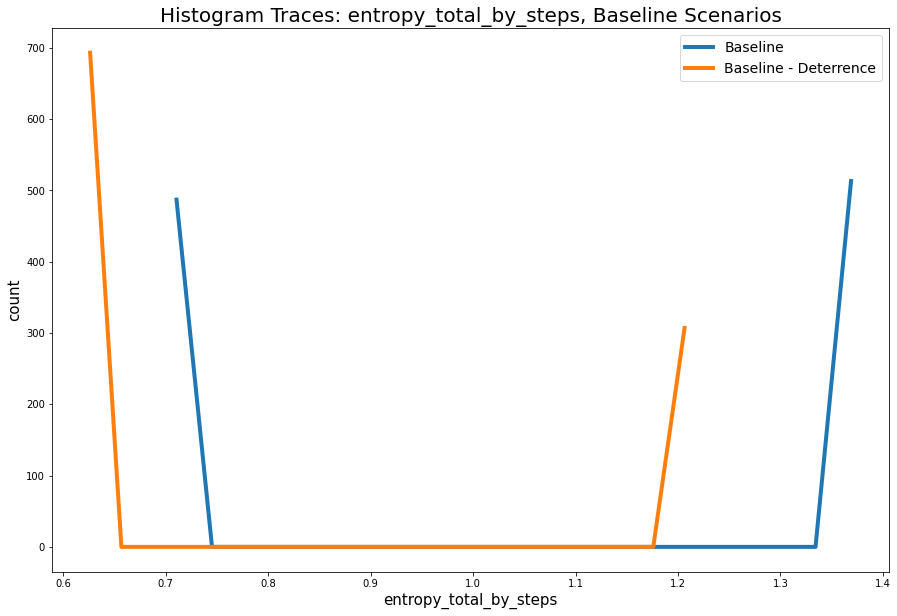

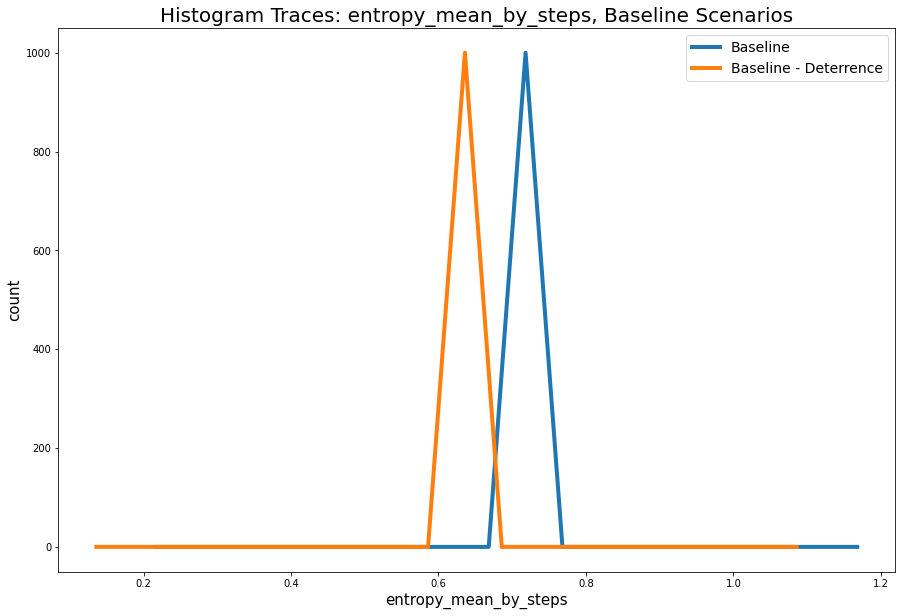

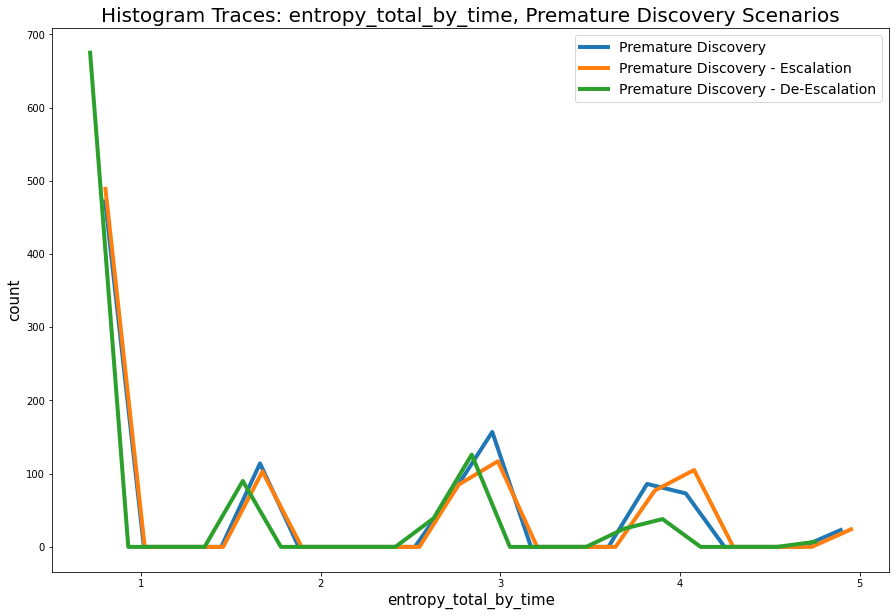

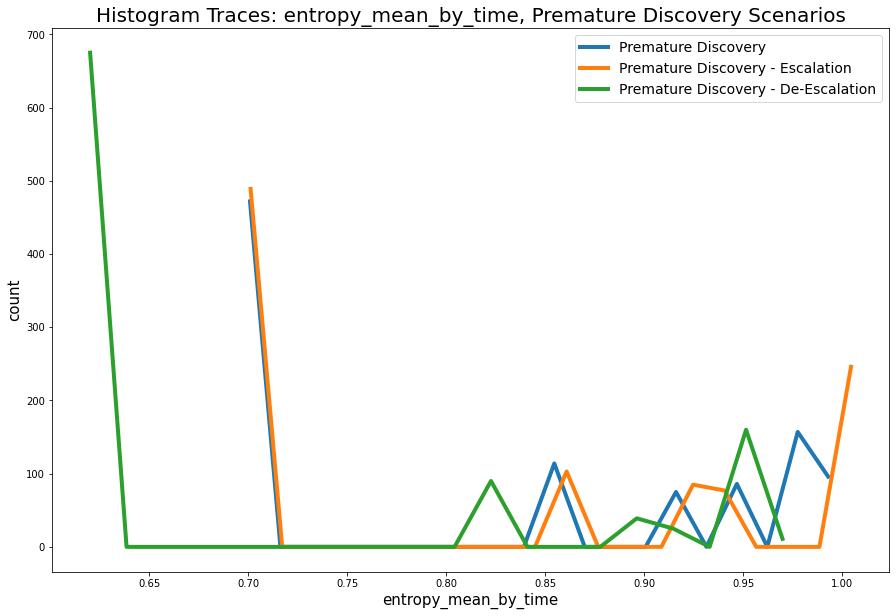

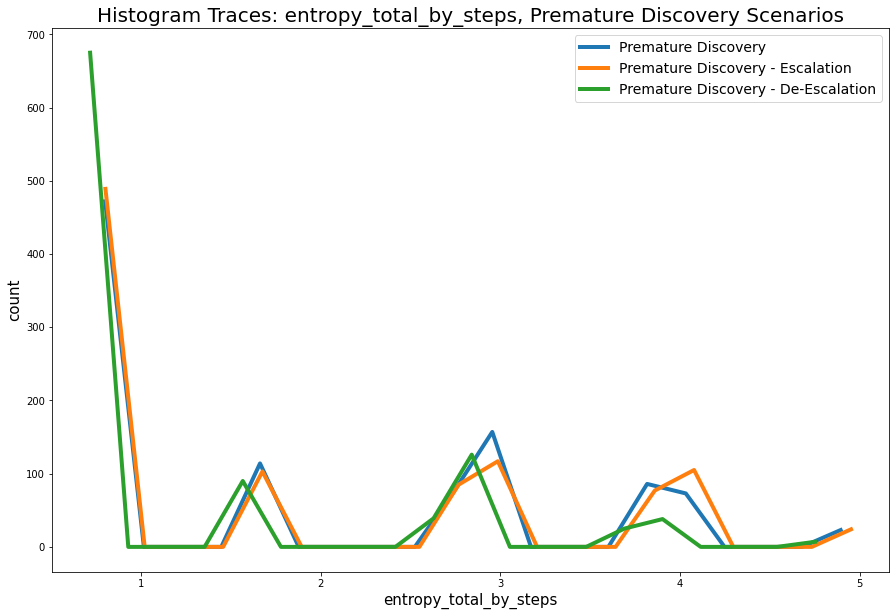

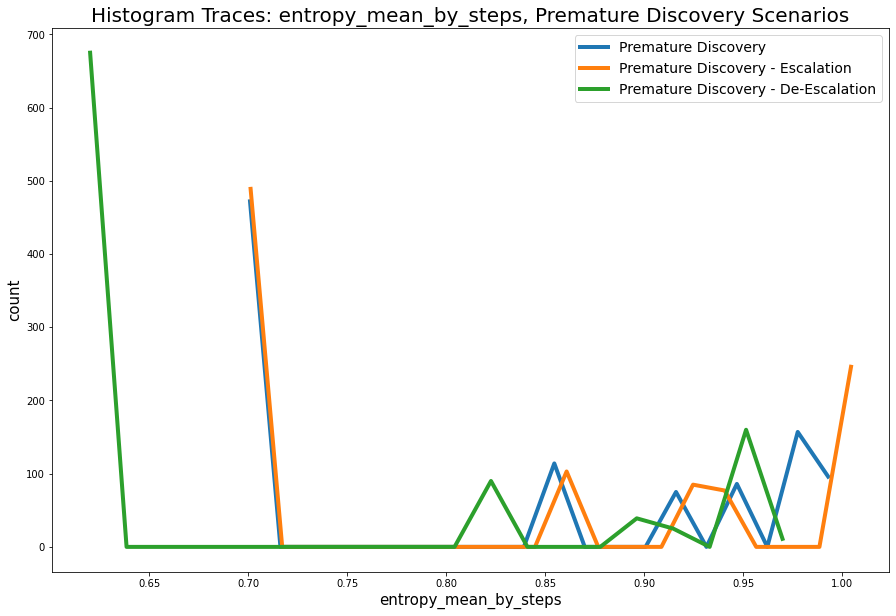

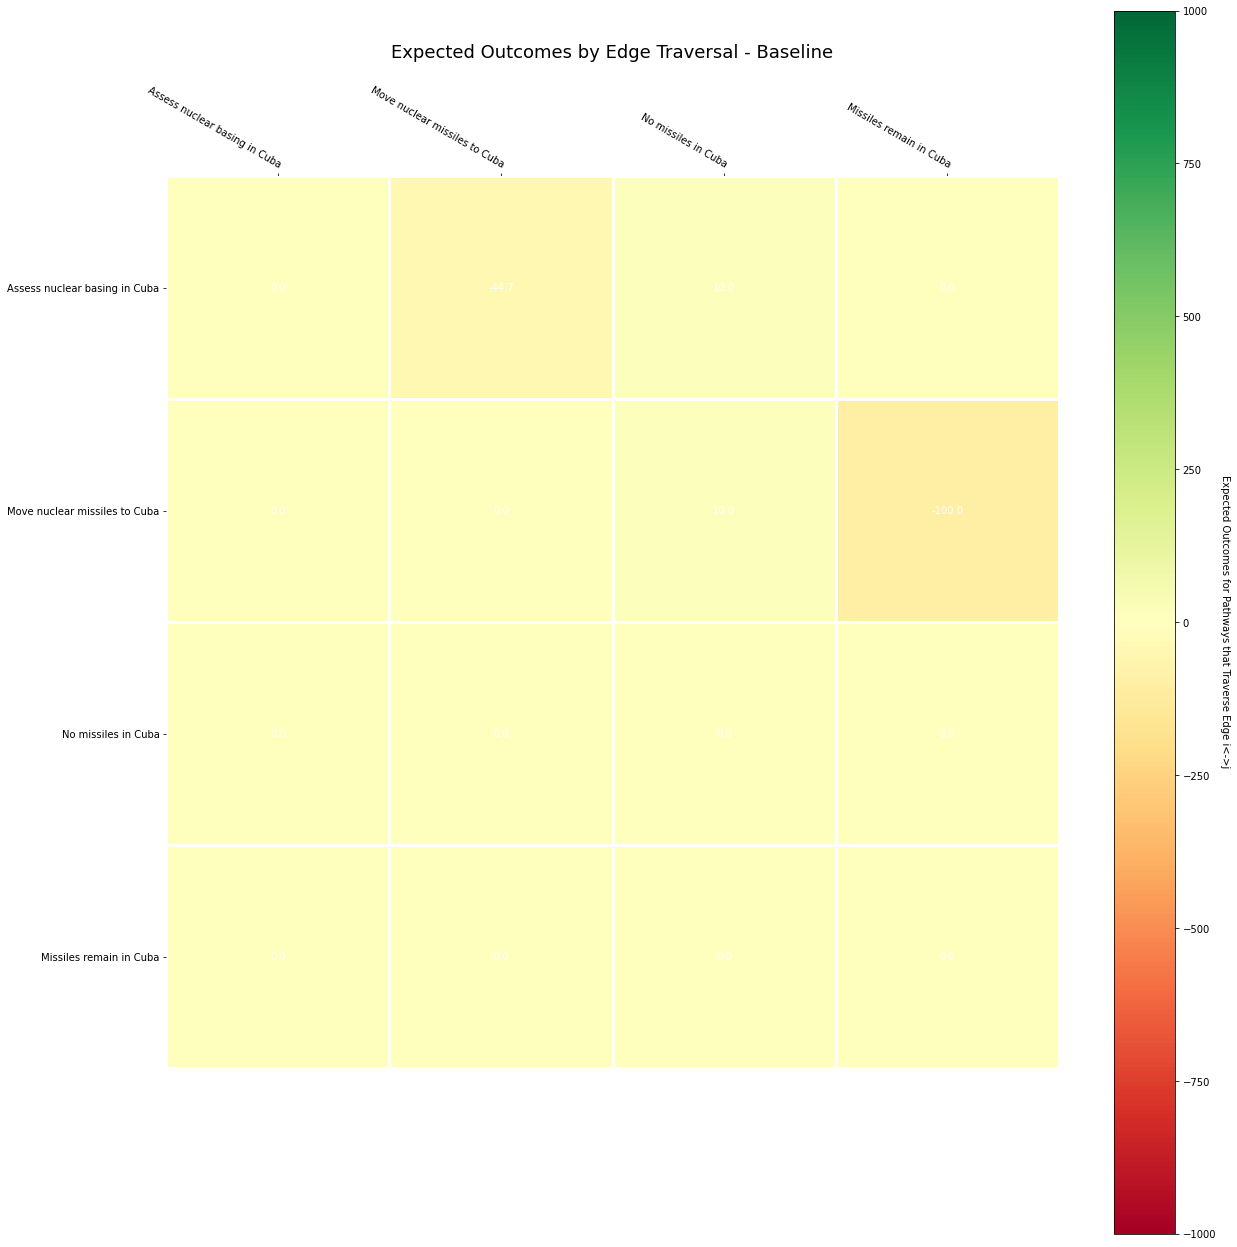

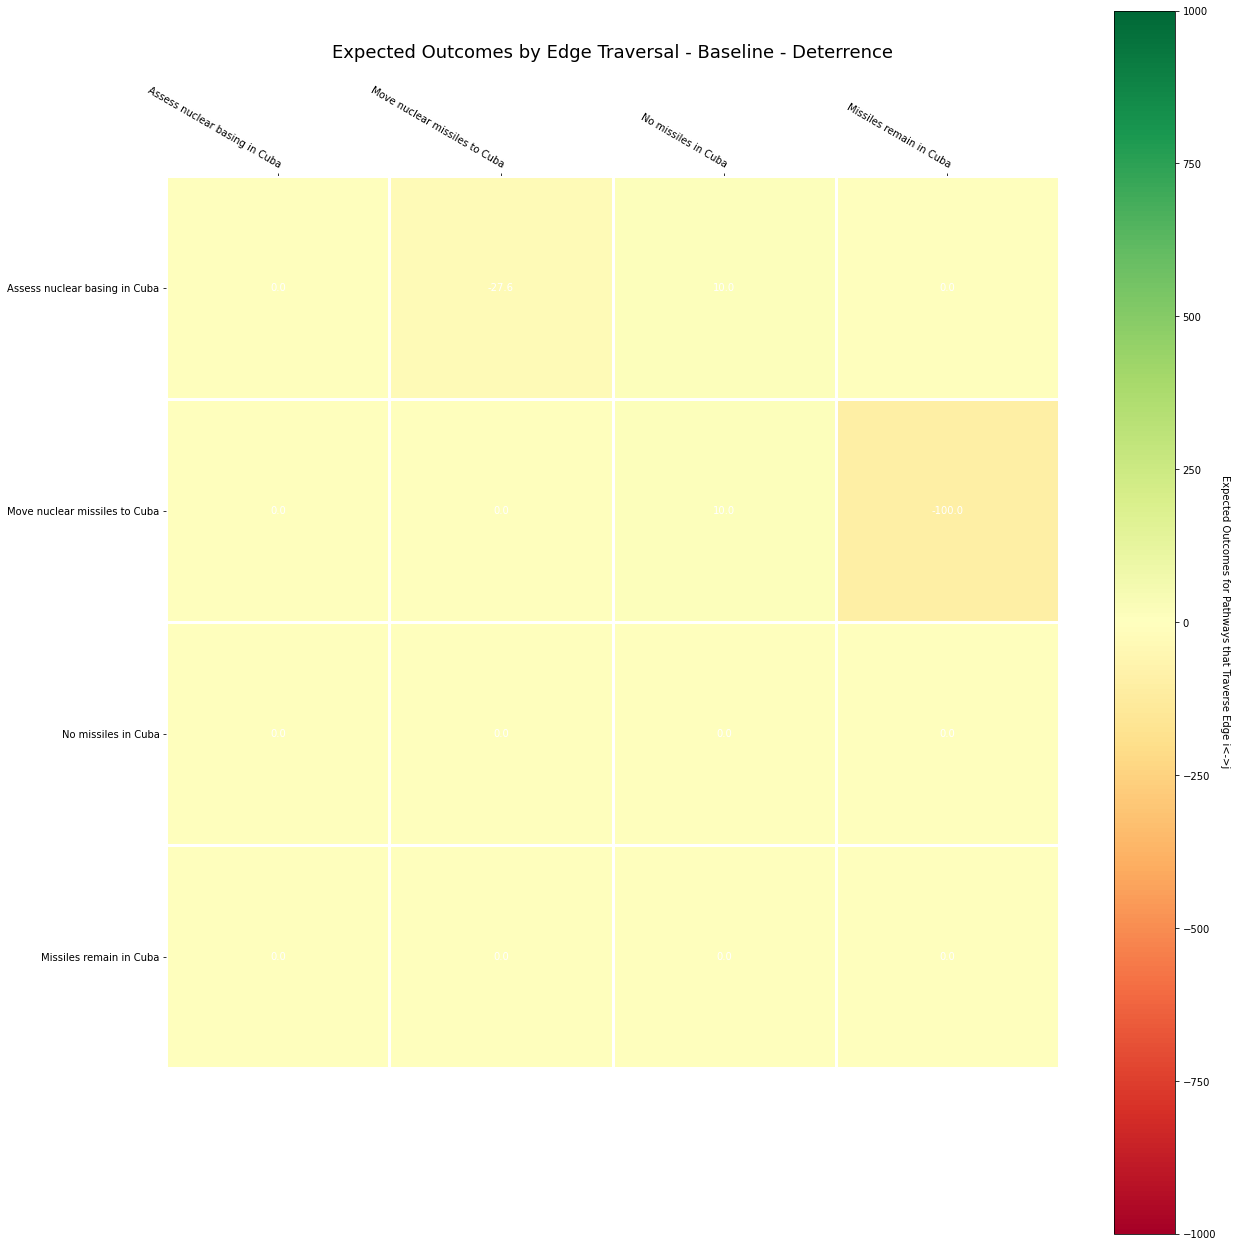

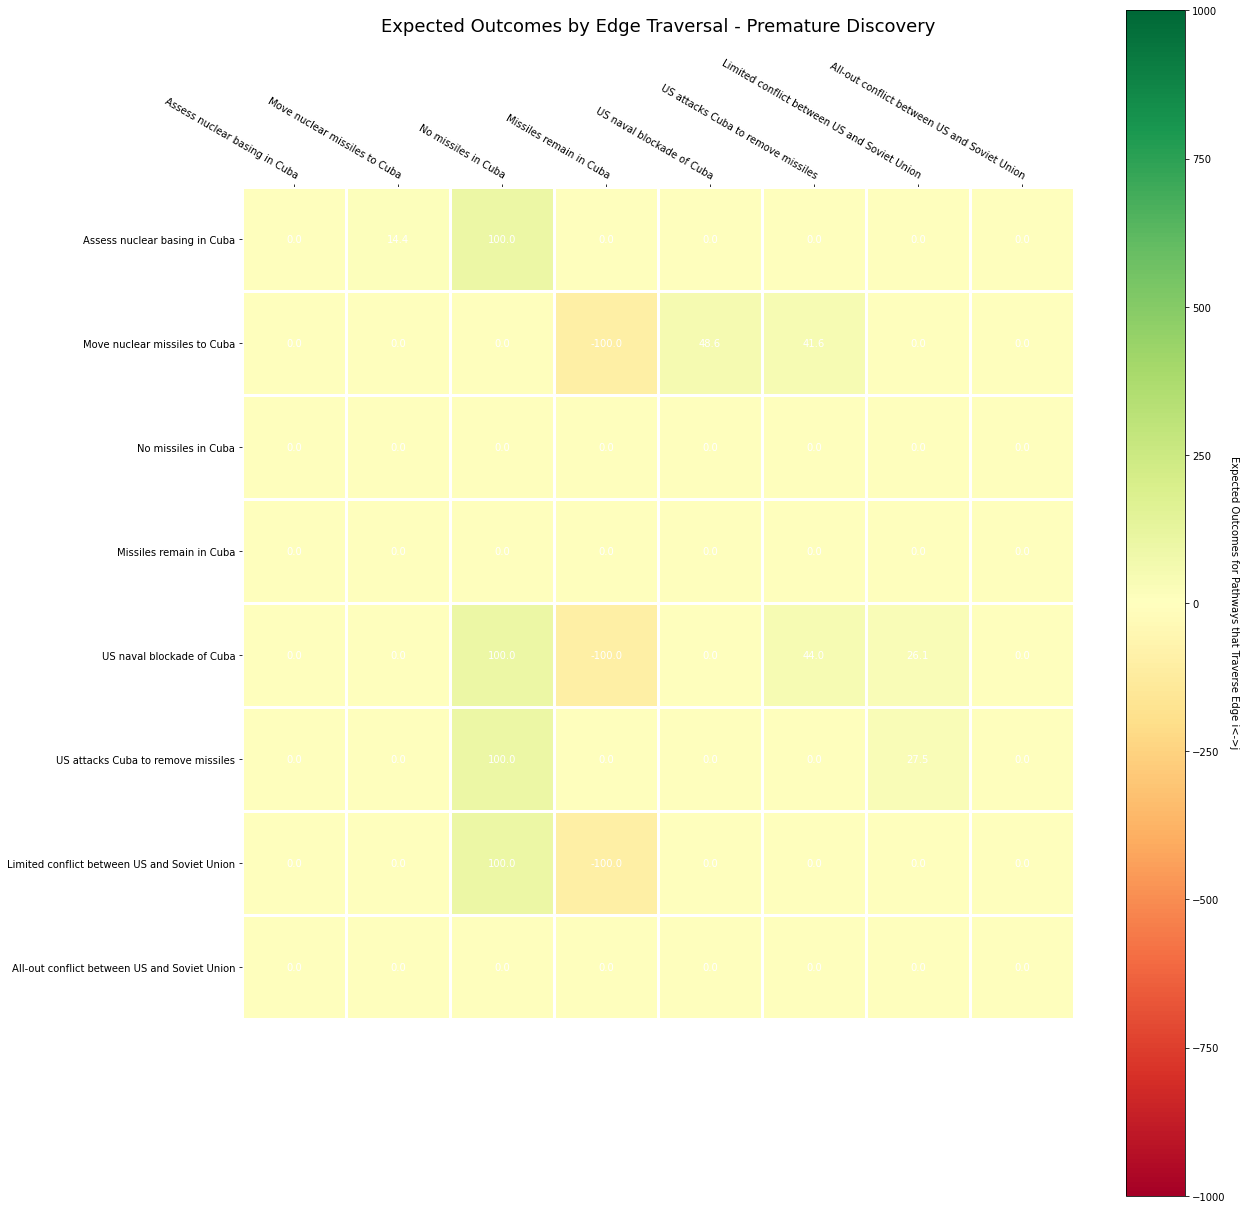

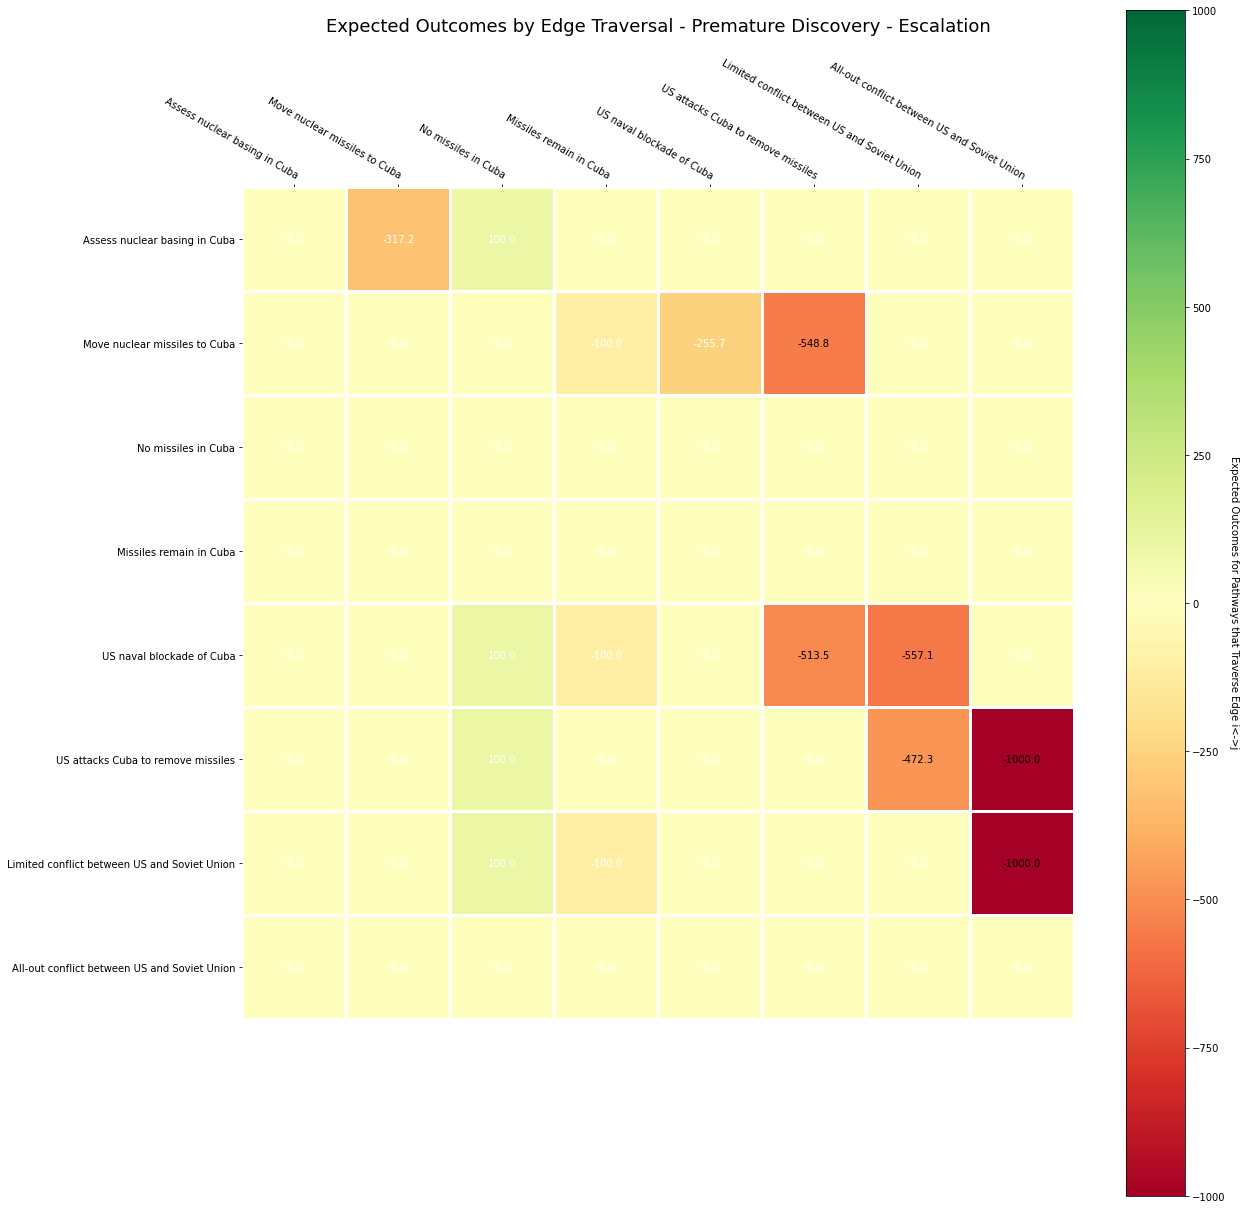

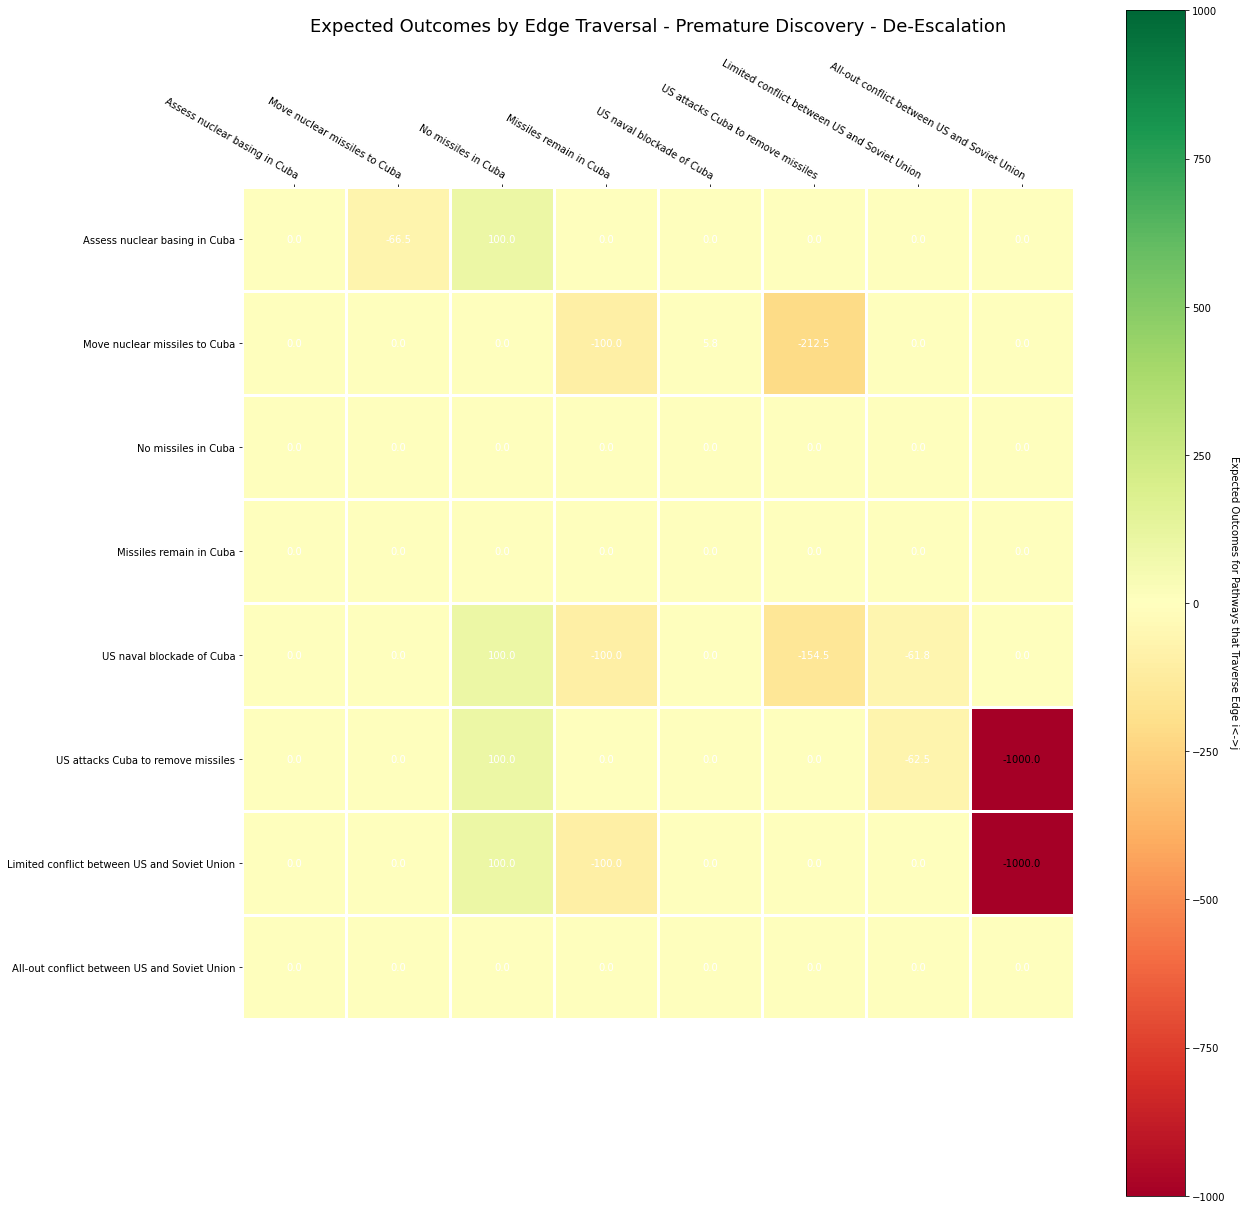

In [4]:
##  RUN CMC

dir_read = "/Users/jsyme/Documents/Projects/FY21/PAF21/markov_decision_utilities/out/20220503_113122_output_cuban_missile_crisis"
dir_base_read = os.path.basename(dir_read)
dir_out = os.path.join("..", "out", f"img_{dir_base_read}")

# load data
attr_scenario, attr_state, df_expected_outcome, df_ov, df_walks = get_markov_data_for_plots(dir_read)

# generate plots
generate_overlayed_outcome_histogram_plots(
    df_ov,
    attr_scenario,
    {"Baseline": [0, 1], "Premature Discovery": [2, 3, 4]},
    ["entropy_total_by_time", "entropy_mean_by_time", "entropy_total_by_steps", "entropy_mean_by_steps"],
    dir_out
)

generate_expected_value_matrix_plots(
    df_expected_outcome,
    attr_scenario,
    attr_state,        
    dir_out
);




